# *HR Employee Attrition*

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command
import seaborn as sns

In [3]:
df = pd.read_csv('HR_Employee_Attrition_Data1.csv')

In [4]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [5]:
pd.set_option('display.max_columns',50)
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [8]:
df.describe(include="O")# object

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

In [9]:
df.describe(percentiles=[0.10,0.20,0.50,0.90])

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
10%      26.000000   242.800000          1.000000     1.000000            1.0   
20%      29.000000   391.800000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
90%      50.000000  1356.000000         23.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
10%        198.900000                 1.000000    38.000000        2.000000   
20%        402.600000                 2.000000    45.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
90%       1857.100000                 4.000000    94.000000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
10%       1.000000         1.000000    2317.600000   4603.000000   
20%       1.000000         2.000000    2695.800000   6887.400000   
50%       2.000000         3.000000    4919.000000  14235.500000   
90%       4.000000         4.000000   13775.600000  24001.700000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
10%              0.000000          11.000000           3.000000   
20%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
90%              7.000000          21.000000           4.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
10%                    1.000000           80.0          0.000000   
20%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
90%                    4.000000           80.0          2.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
10%             3.000000               2

# *Preprocessing*

In [11]:
df1=df.copy()

In [12]:
for column in df1.columns:
    mode = df1[column].mode()[0]
    m=df1[column].value_counts()[mode]
    if m>=1469: # dropping columns that have 1 unique value
        df1.drop([column], axis=1, inplace=True)
        print("dropped column: ", column, ", value: ", mode, ",occurance: ", m[m>=1469]  )
        print("-----")

dropped column:  EmployeeCount , value:  1 ,occurance:  [1470]
-----
dropped column:  Over18 , value:  Y ,occurance:  [1470]
-----
dropped column:  StandardHours , value:  80 ,occurance:  [1470]
-----


In [13]:
df1.shape

(1470, 32)

***Handling null values***

In [15]:
df1.isnull()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeNumber  \
0                False      False           False           False   
1                False      False           False           False   
2                False      False           False           False   
3                False      False           False           False   
4                False      False           False           False   
...                ...        ...             ...             ...   
1465             False      False           False           False   
1466             False      False           False           False   
1467             False      False           False           False   
1468             False      False           False           False   
1469             False      False           False           False   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                       False   False       False           False     False   
1                       False   False       False           False     False   
2                       False   False       False           False     False   
3                       False   False       False           False     False   
4                       False   False       False           False     False   
...                       ...     ...         ...             ...       ...   
1465                    False   False       False           False     False   
1466                    False   False       False           False     False   
1467                    False   False       False           False     False   
1468                    False   False       False           False     False   
1469                    False   False       False           False     False   

      JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0       False            False          False          False        False   
1       False            False          False          False        False   
2       False            False          False          False        False   
3       False            False          False          False        False   
4       False            False          False          False        False   
...       ...              ...            ...            ...          ...   
1465    False            False          False          False        False   
1466    False            False          False          False        False   
1467    False            False          False          False        False   
1468    False            False          False          False        False   
1469    False            False          False          False        False   

      NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                  False     False              False              False   
1                  False     False              False              False   
2                  False     False              False              False   
3                  False     False              False              False   
4                  False     False              False              False   
...                  ...       ...                ...               

In [16]:
df1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [17]:
df1.isnull().sum().sum()

0

**Handling Outliers**

In [19]:
numericcolumns = df1.select_dtypes(include=[np.number]).columns
outliercols=[]
for column in numericcolumns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lf = Q1 - 1.5 * IQR
    uf = Q3 + 1.5 * IQR
    if (df1[column] < lf).any() or (df1[column] > uf).any():
            outliercols.append(column)

In [20]:
outliercols

['MonthlyIncome',
 'NumCompaniesWorked',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

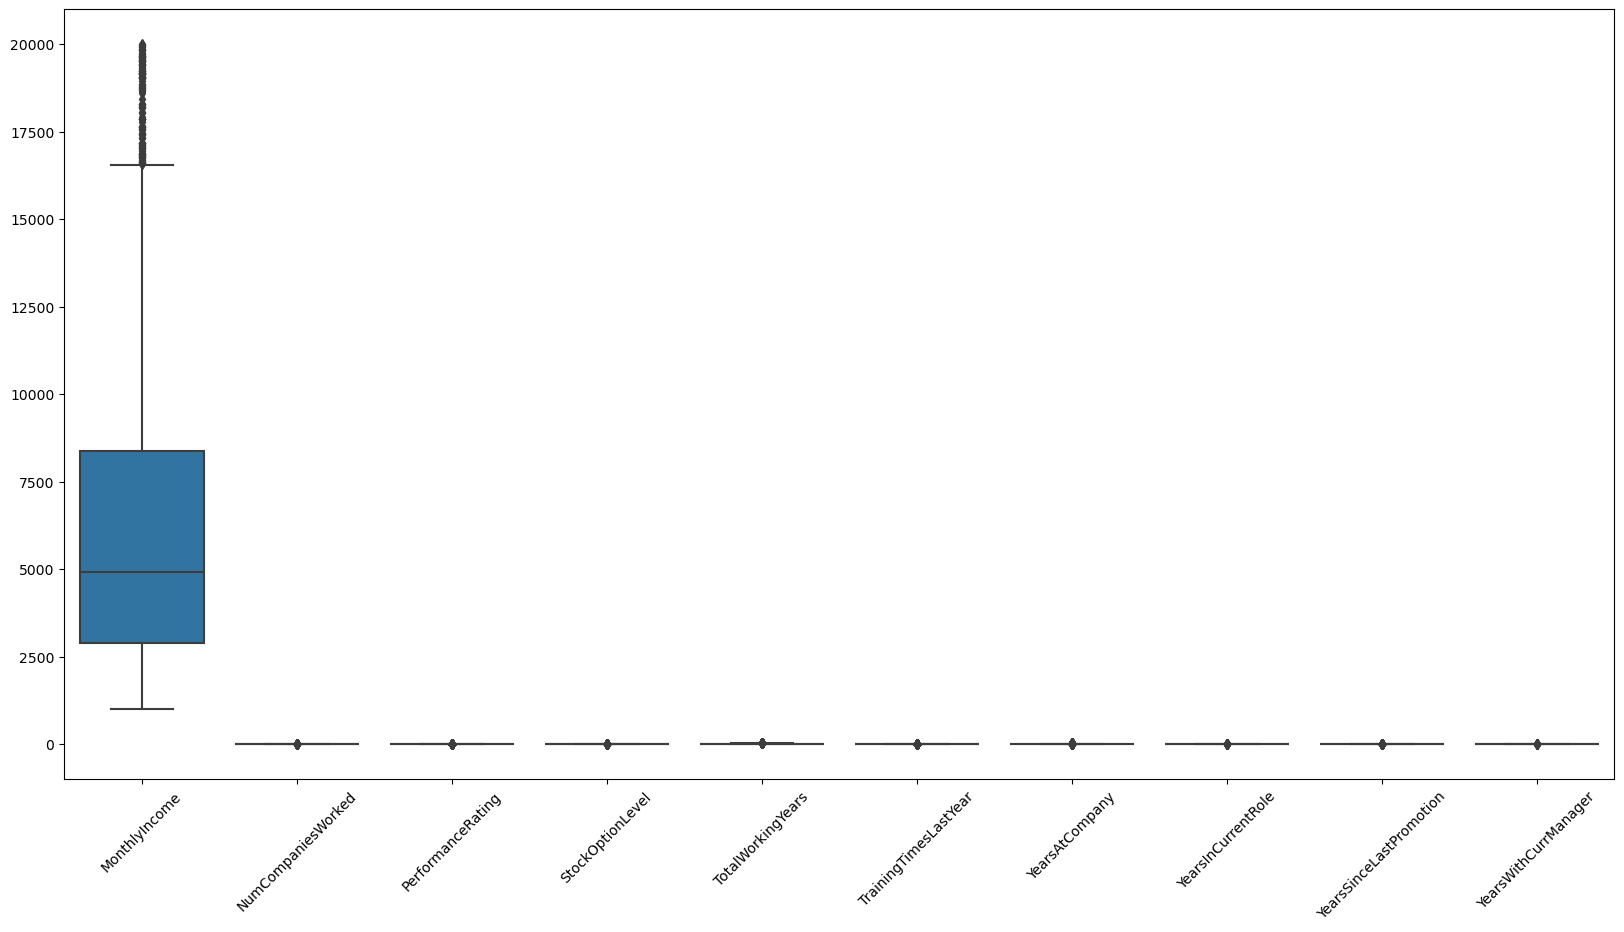

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1[outliercols])
plt.xticks(rotation=45)
plt.show()

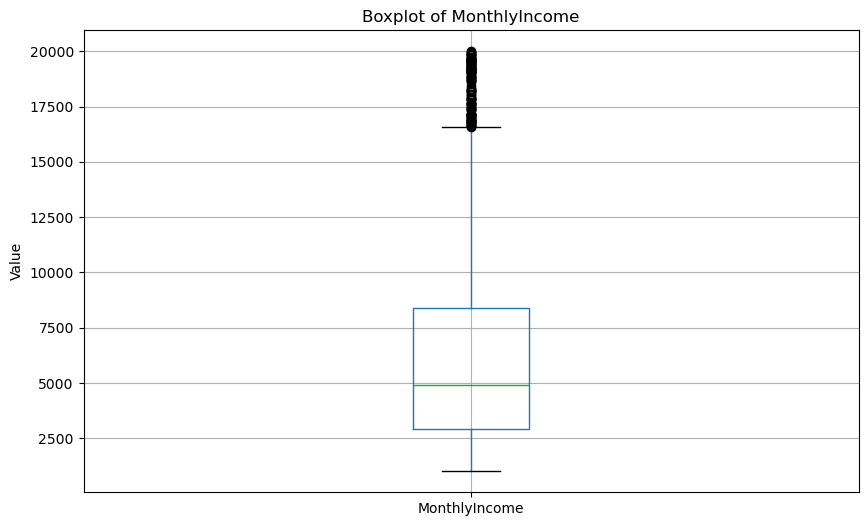

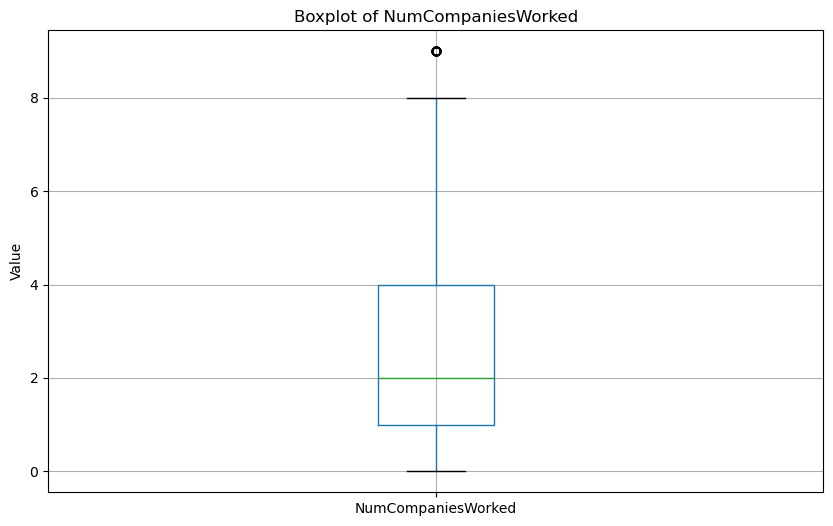

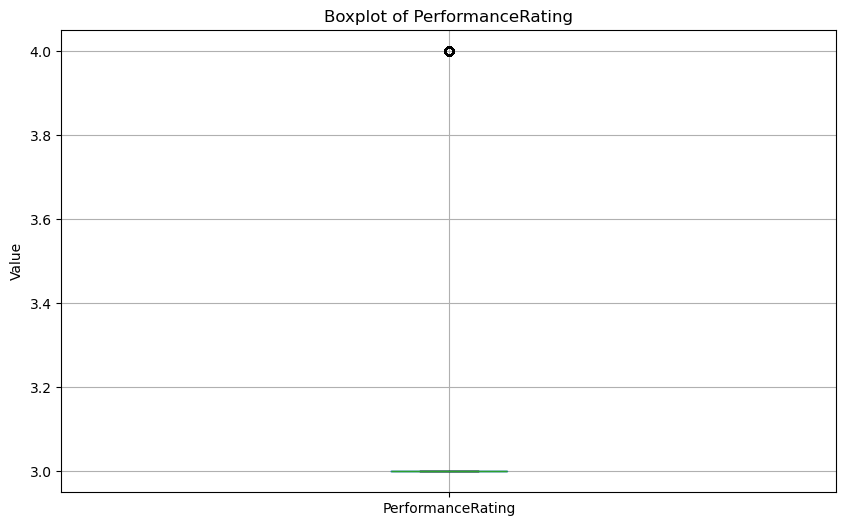

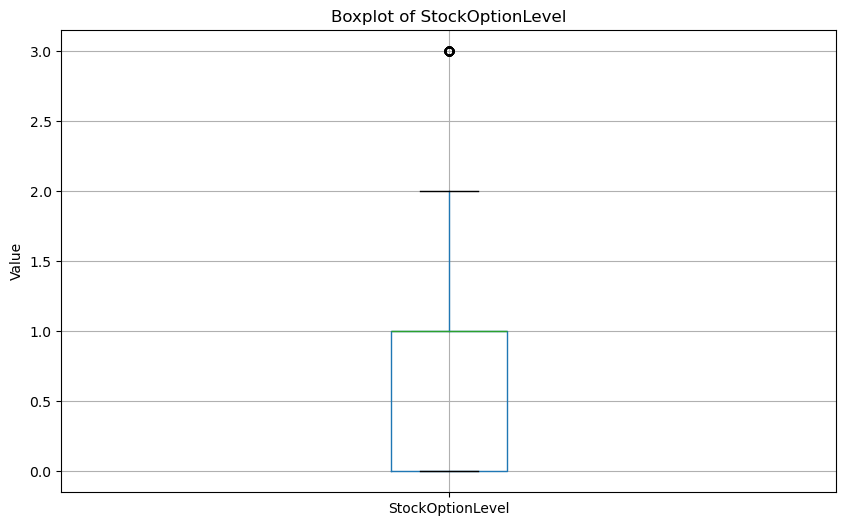

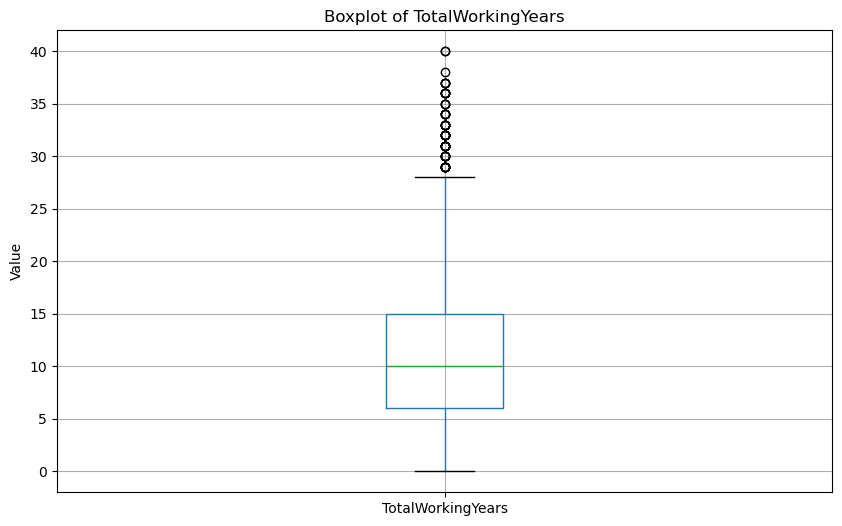

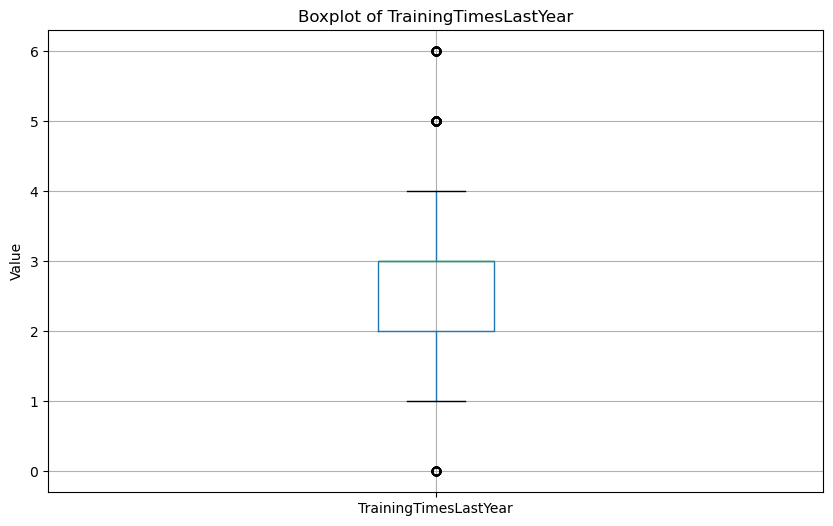

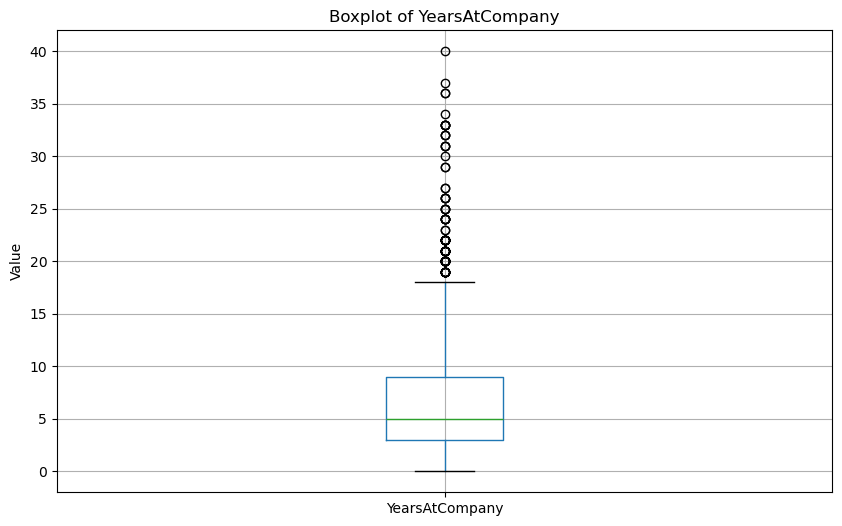

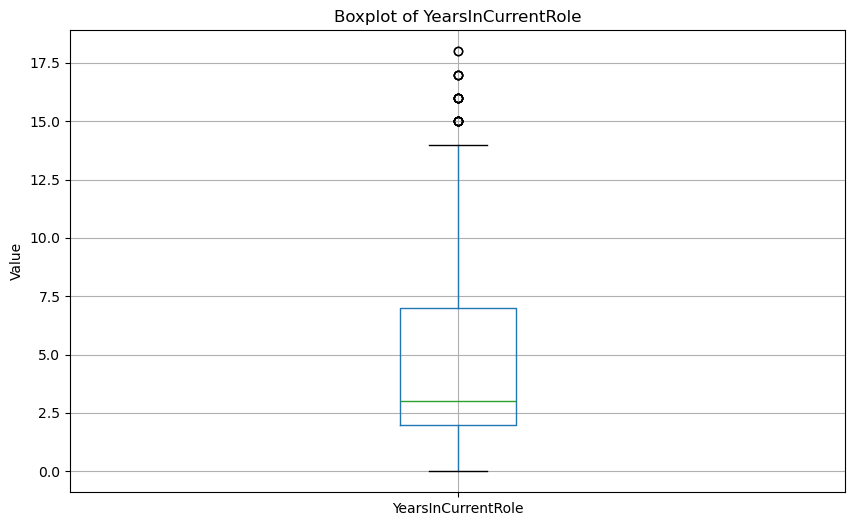

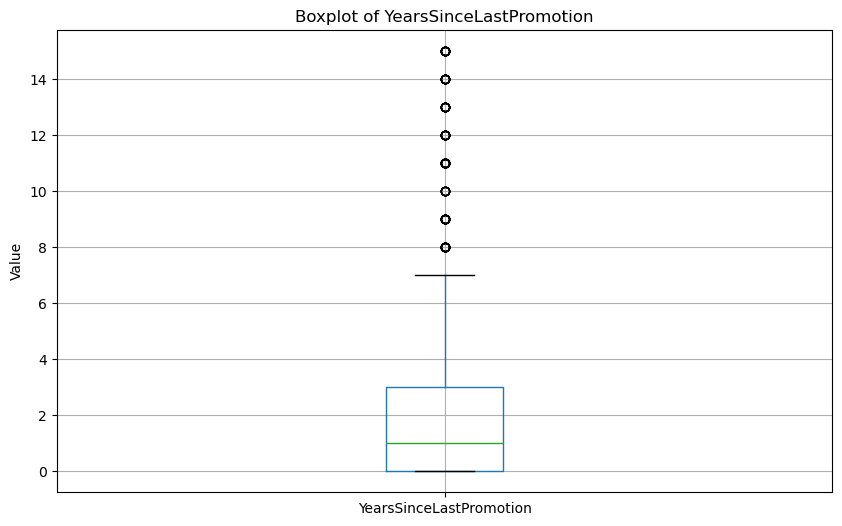

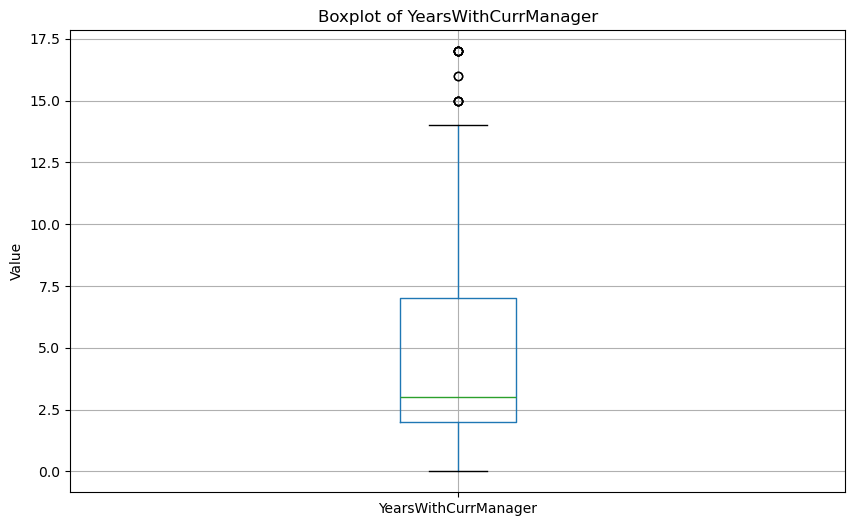

In [22]:
for column in outliercols:
    plt.figure(figsize=(10, 6))
    df1.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    
    plt.ylabel('Value')
    plt.show()
    


In [23]:

for column in numericcolumns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lf = Q1 - 1.5 * IQR
    uf = Q3 + 1.5 * IQR
    df1[column] = np.where(df1[column] < lf, lf, np.where(df1[column] > uf, uf, df1[column]))
   



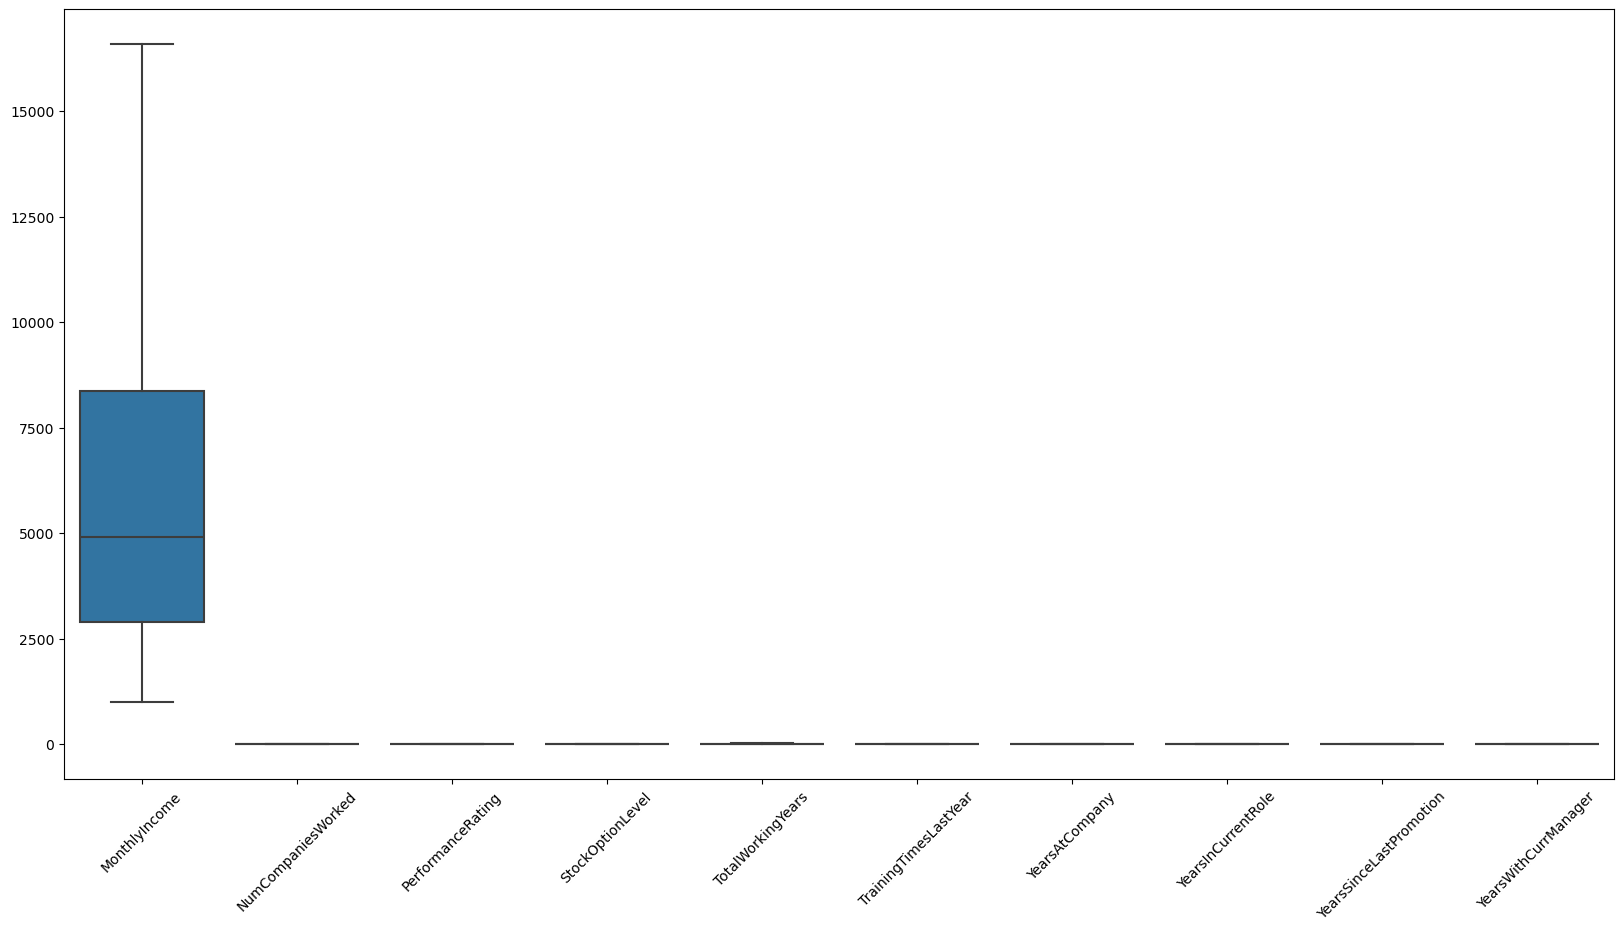

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1[outliercols])
plt.xticks(rotation=45)
plt.show()

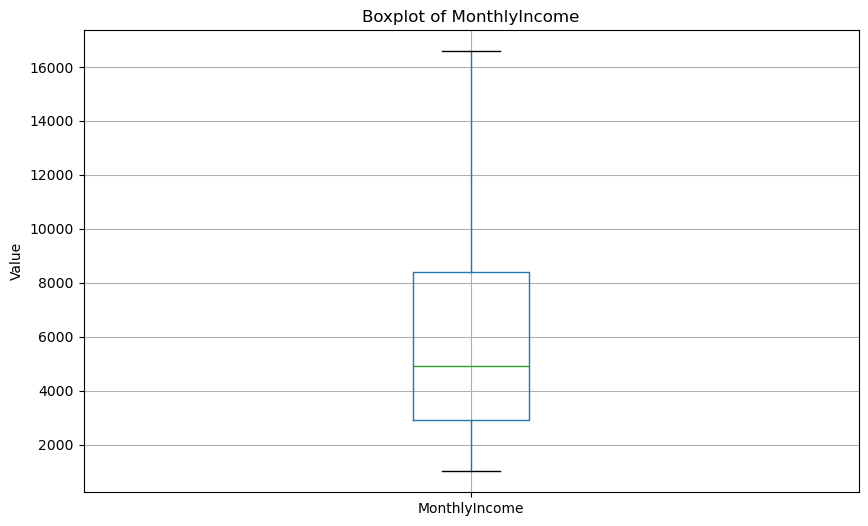

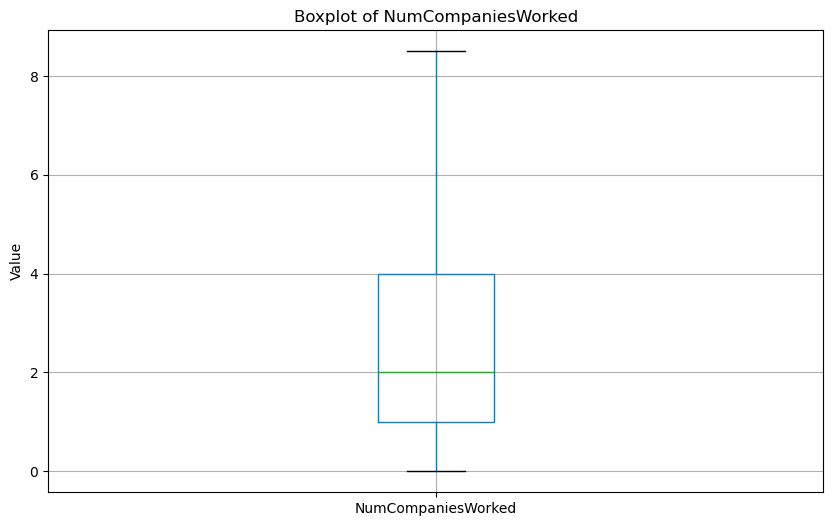

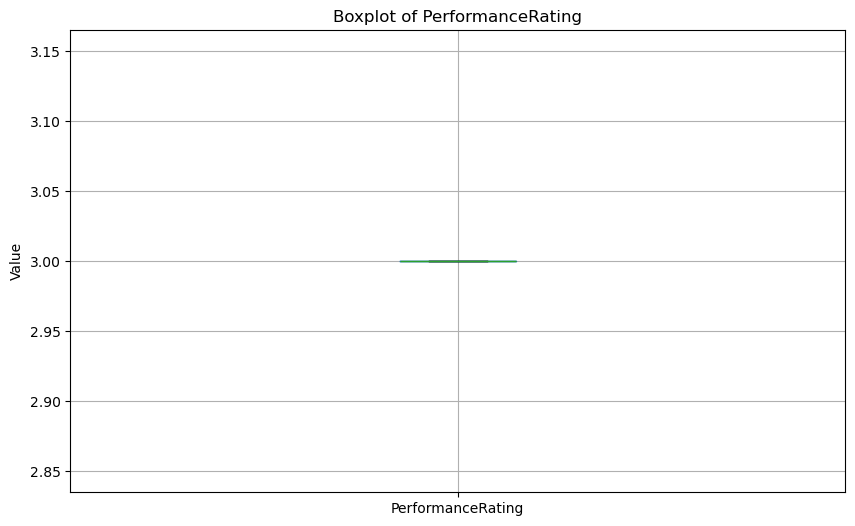

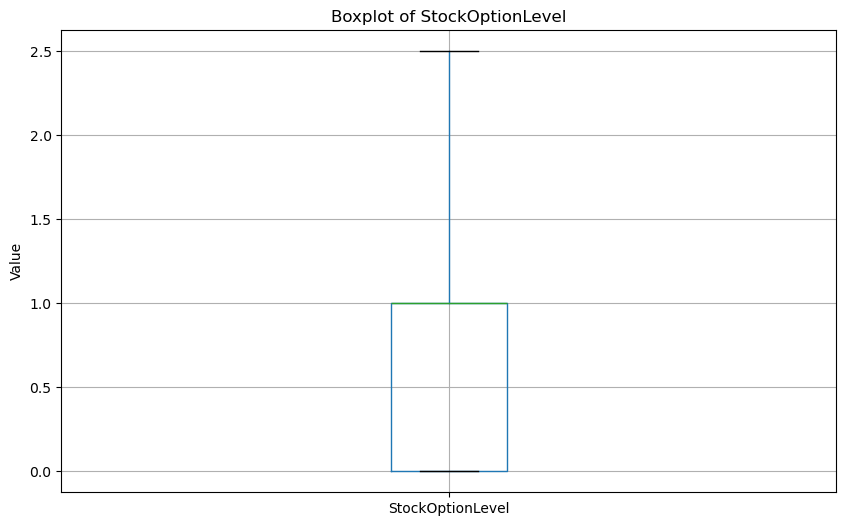

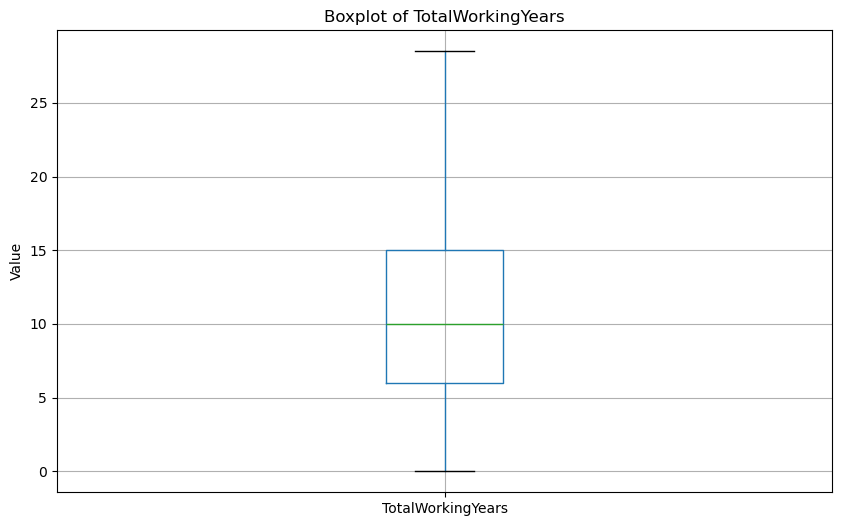

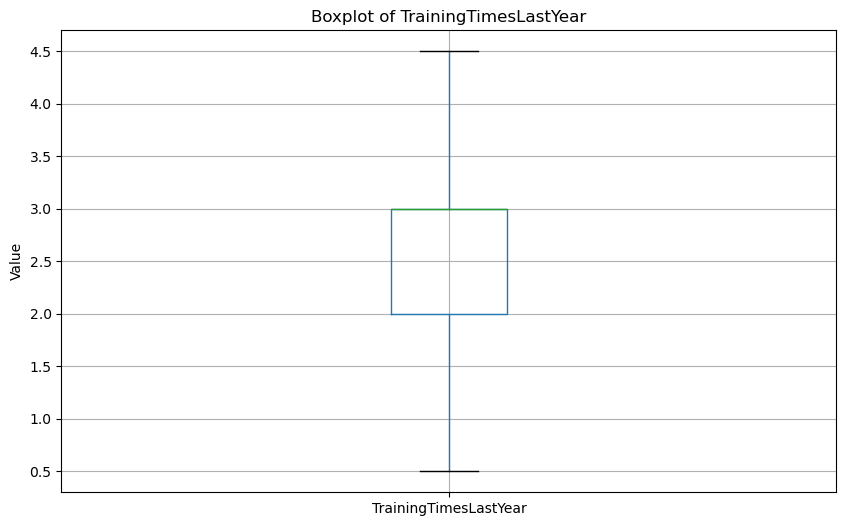

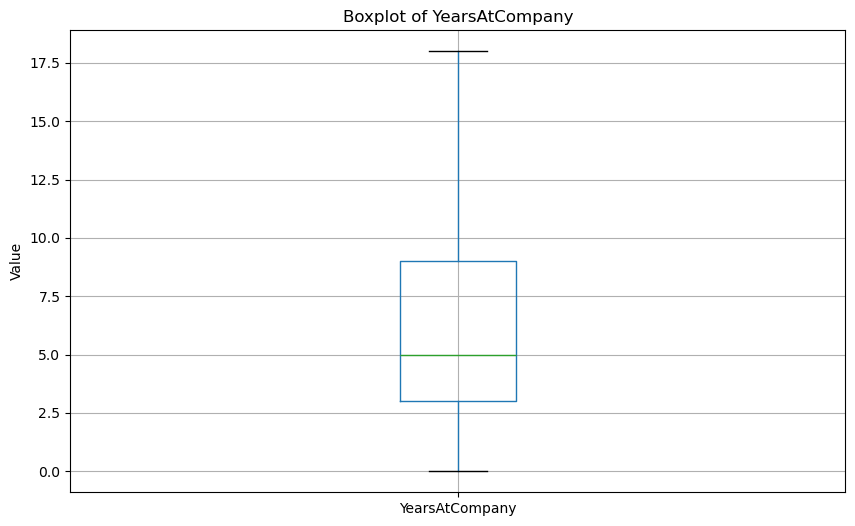

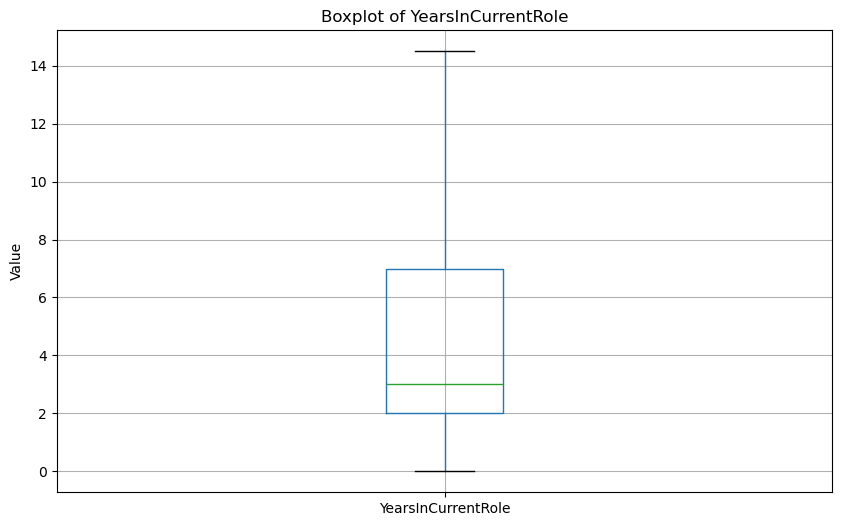

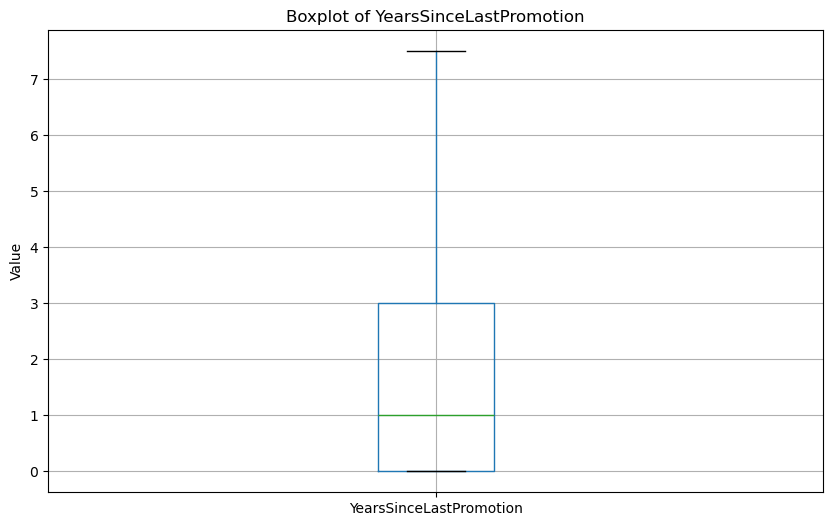

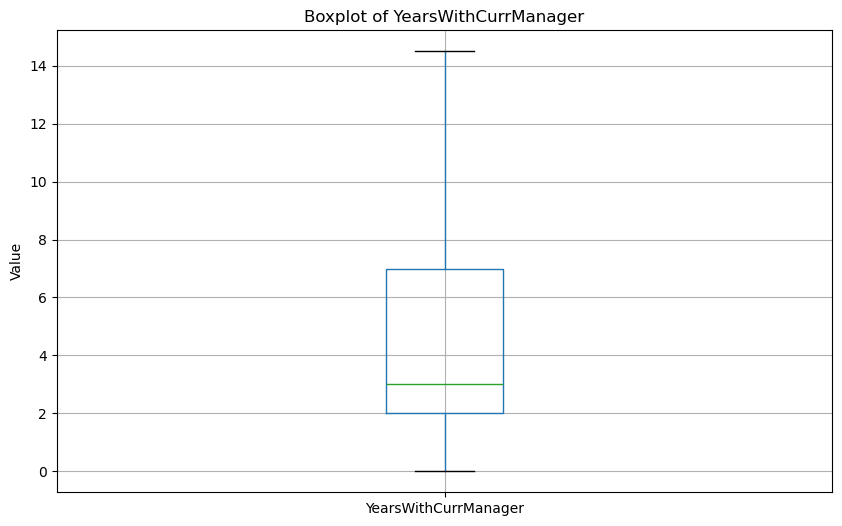

In [25]:
for column in outliercols:
    plt.figure(figsize=(10, 6))
    df1.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    
    plt.ylabel('Value')
    plt.show()
    


***Label Encoding***

In [27]:
categoricalcolumns = df1.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categoricalcolumns)

Categorical Columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


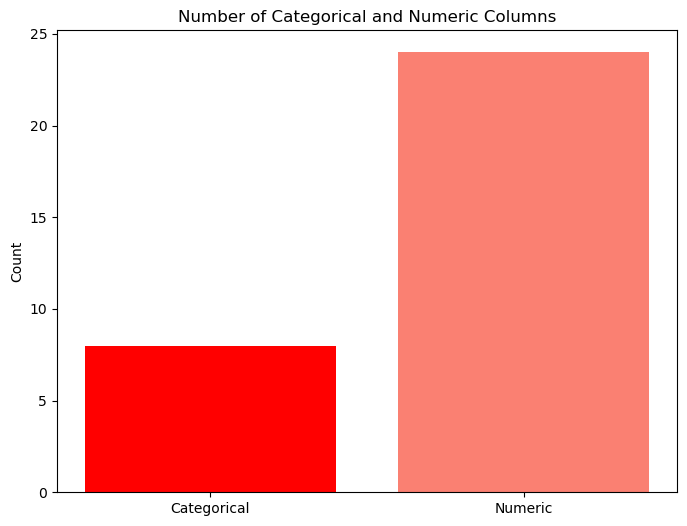

In [28]:
c_count = len(df1.select_dtypes(include=['object', 'category']).columns)
n_count = len(df1.select_dtypes(include=['int64', 'float64']).columns)

column_types = pd.DataFrame({
    'Column Type': ['Categorical', 'Numeric'],
    'Count': [c_count, n_count]
})

plt.figure(figsize=(8, 6))
plt.bar(column_types['Column Type'], column_types['Count'], color=['red', 'salmon'])
plt.title('Number of Categorical and Numeric Columns')
plt.ylabel('Count')
plt.show()

In [29]:
labelencoders = {}

for column in df1.columns:
    if df1[column].dtype == 'object':
        labelencoders[column] = LabelEncoder()
        df1[column] = labelencoders[column].fit_transform(df1[column])

df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   int32  
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int32  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   int32  
 8   EmployeeNumber            1470 non-null   float64
 9   EnvironmentSatisfaction   1470 non-null   float64
 10  Gender                    1470 non-null   int32  
 11  HourlyRate                1470 non-null   float64
 12  JobInvolvement            1470 non-null   float64
 13  JobLevel                  1470 non-null   float64
 14  JobRole 

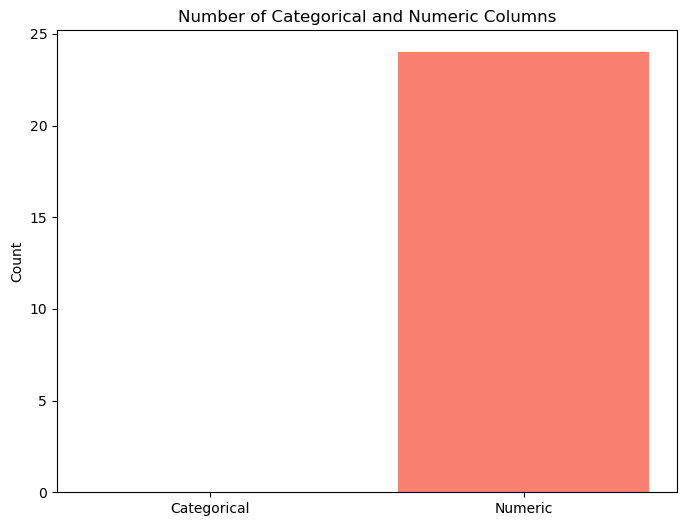

In [30]:
c_count = len(df1.select_dtypes(include=['object', 'category']).columns)
n_count = len(df1.select_dtypes(include=['int64', 'float64']).columns)

column_types = pd.DataFrame({
    'Column Type': ['Categorical', 'Numeric'],
    'Count': [c_count, n_count]
})

plt.figure(figsize=(8, 6))
plt.bar(column_types['Column Type'], column_types['Count'], color=['red', 'salmon'])
plt.title('Number of Categorical and Numeric Columns')
plt.ylabel('Count')
plt.show()

# *EDA*

**Line Plot**

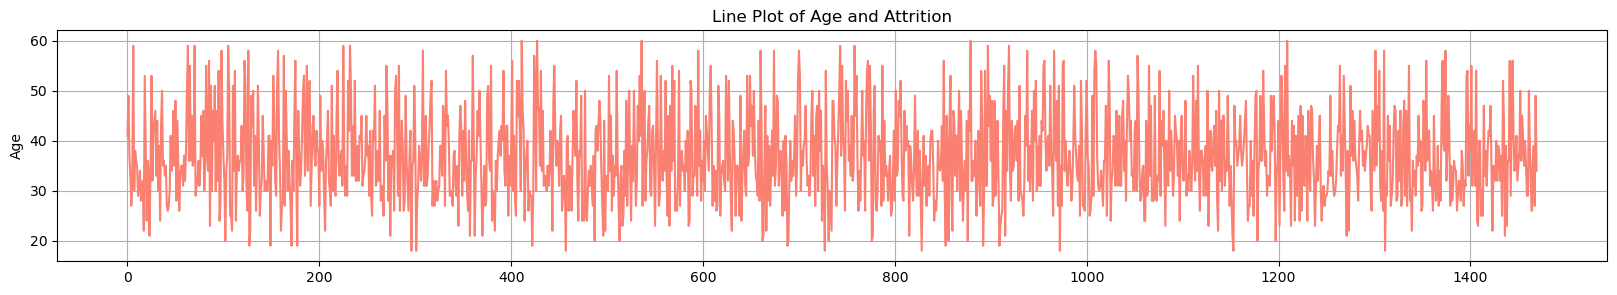

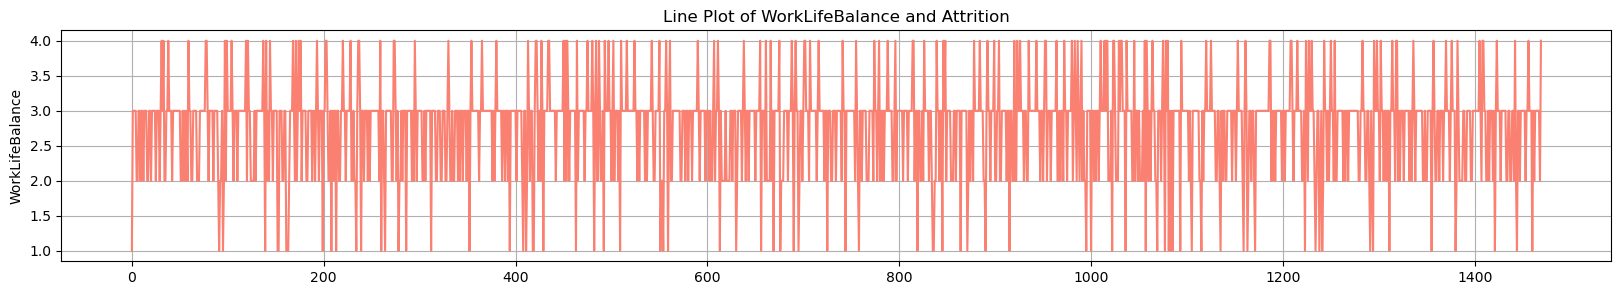

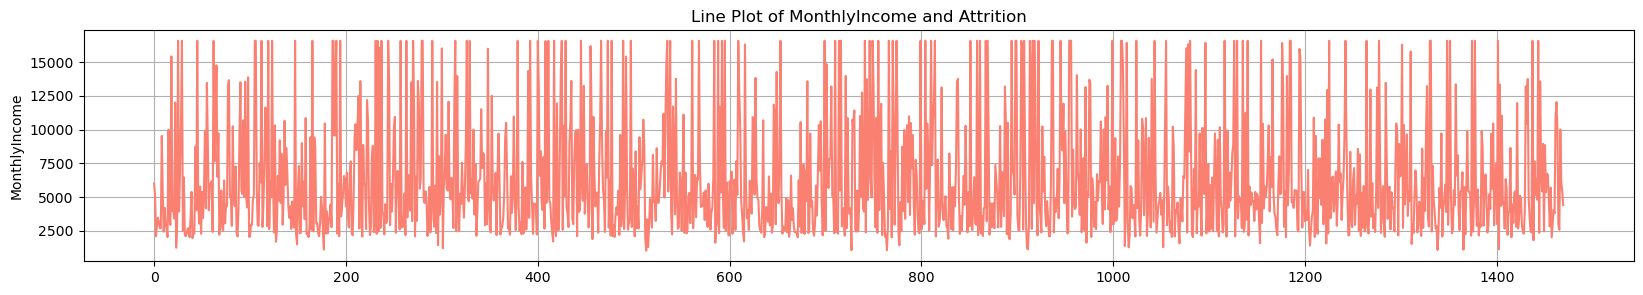

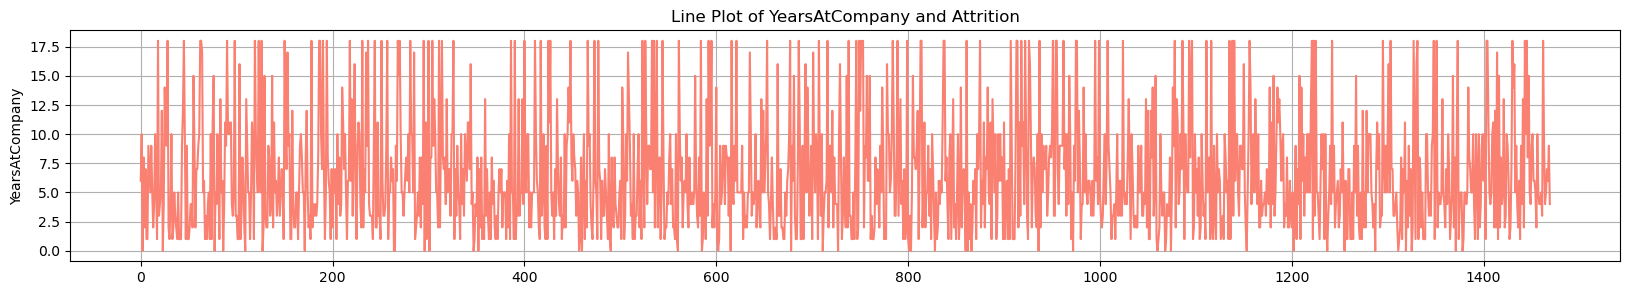

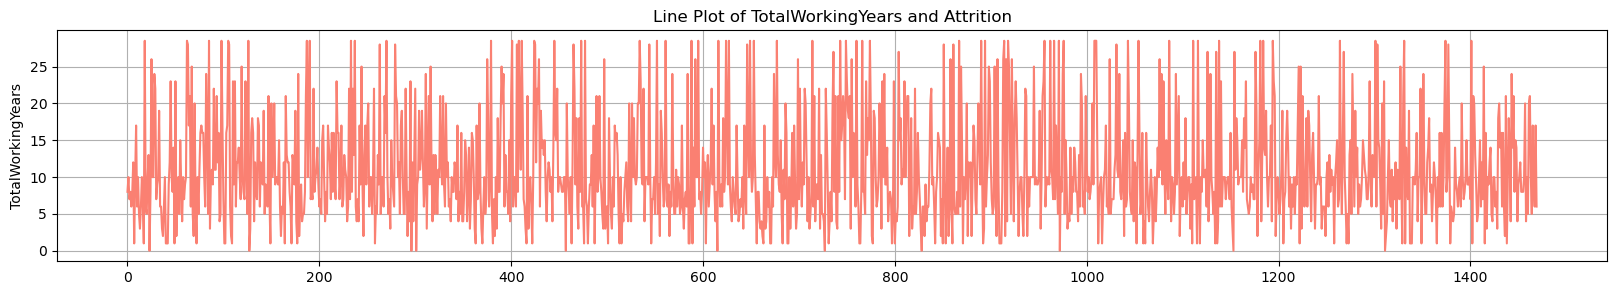

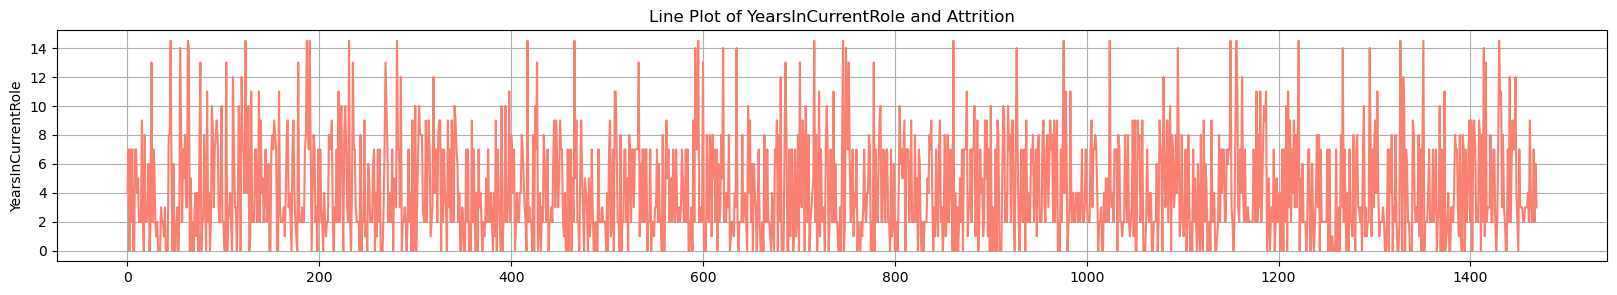

In [33]:
columns=['Age', 'WorkLifeBalance', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'YearsInCurrentRole']
for col in columns:
    plt.figure(figsize=(20, 3))
    sns.lineplot(x=df1.index, y=col, data=df1, color="salmon")
    plt.title(f'Line Plot of {col} and Attrition')
    
    plt.grid(True)
    plt.show()


***Hist Plot***

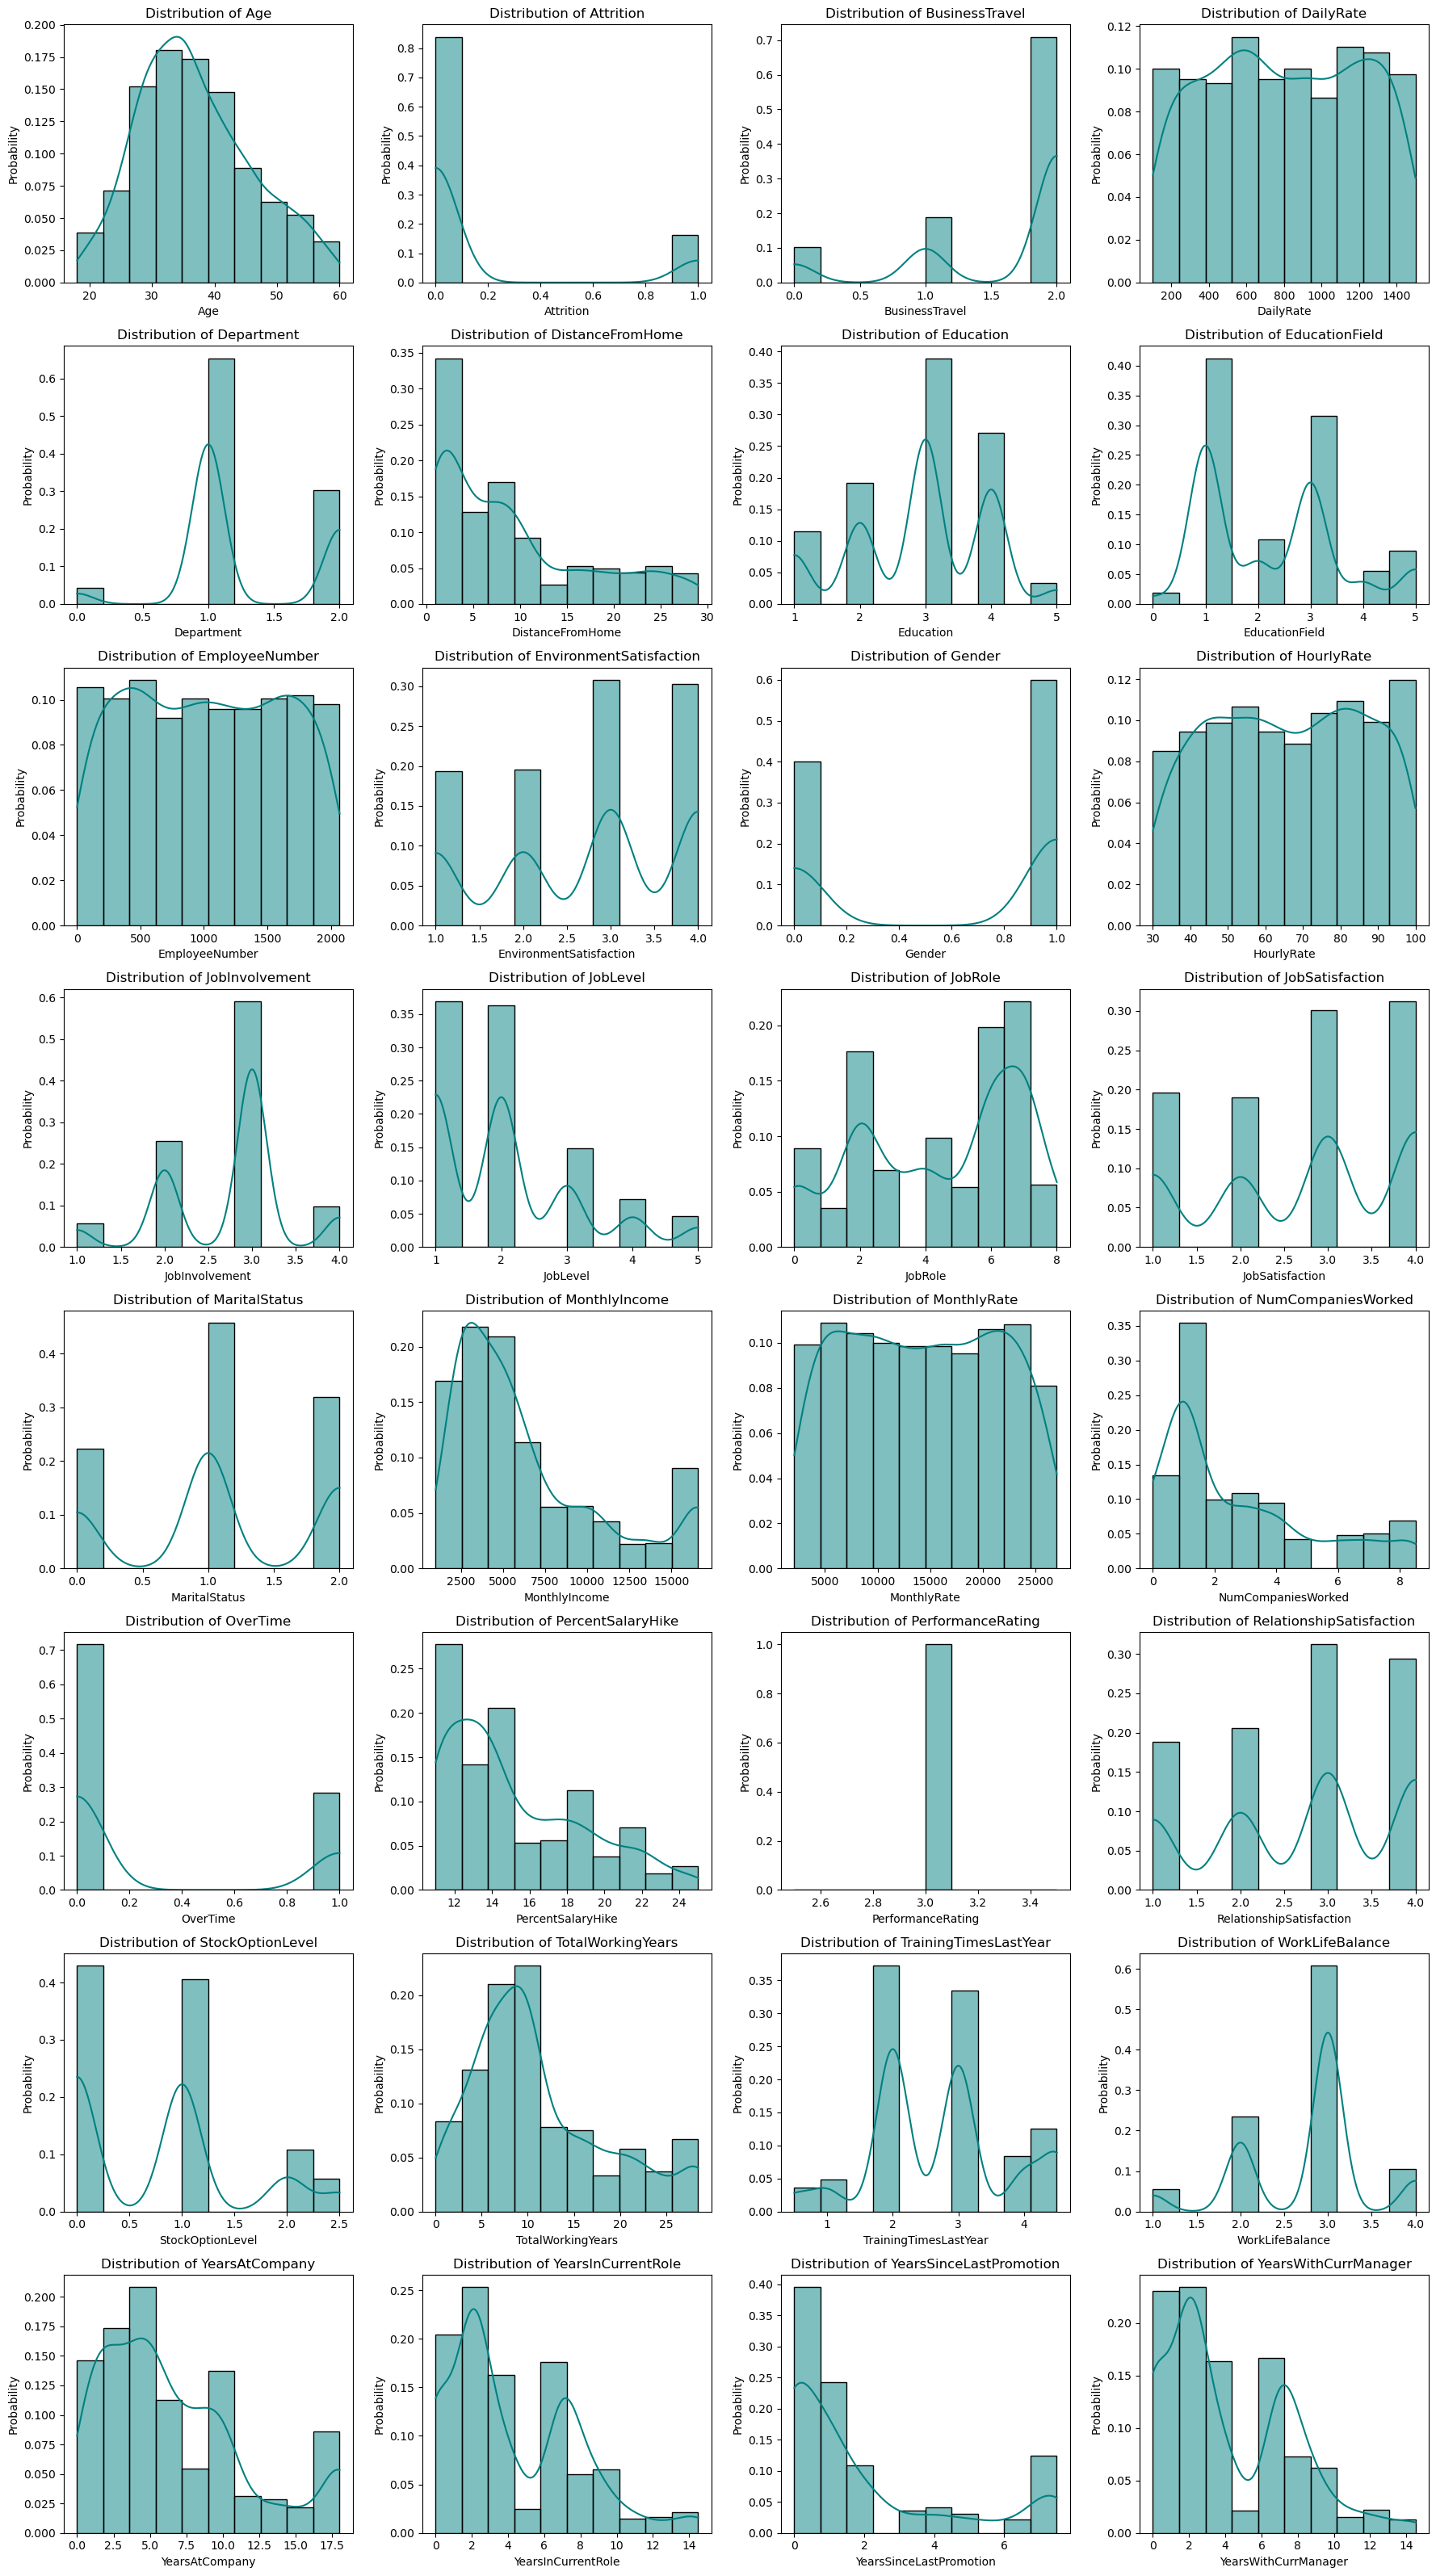

In [35]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(18, 4 * 8))
axes = axes.flatten()
for i, col in enumerate(df1.columns):
    sns.histplot(data=df1, x=col, stat='probability', bins=10, kde=True, ax=axes[i], color="teal" )
    axes[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

***Count Plot***

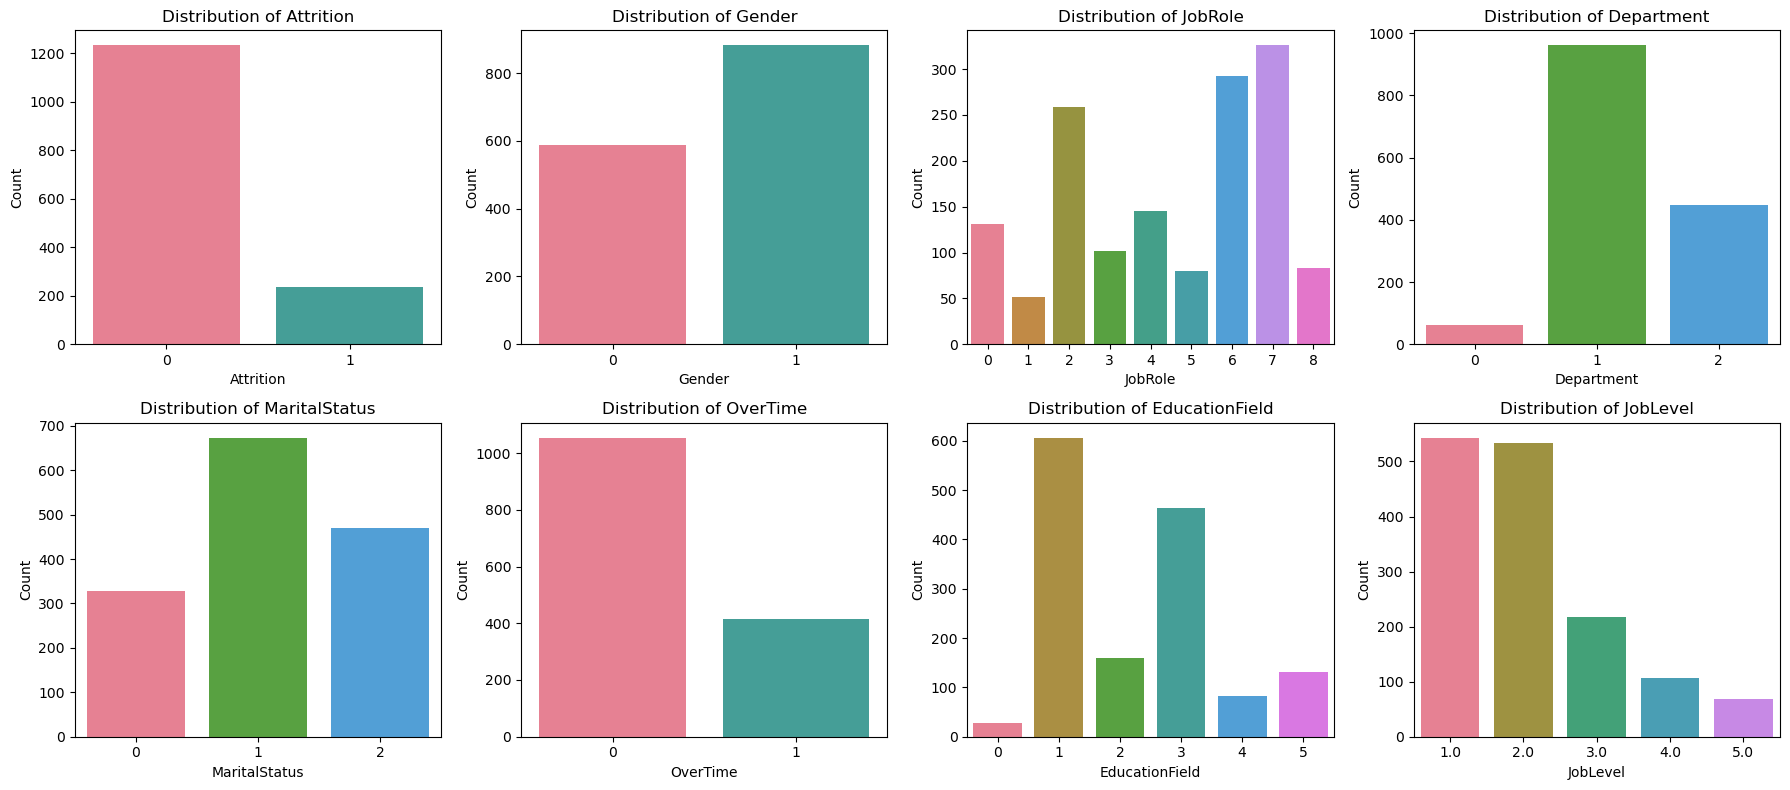

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 2*4))
axes = axes.flatten()
columns=['Attrition', 'Gender', 'JobRole', 'Department', 'MaritalStatus', 'OverTime', 'EducationField', 'JobLevel']
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df1, ax=axes[i], palette="husl")
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
plt.tight_layout()
plt.show()

***Violin Plot***

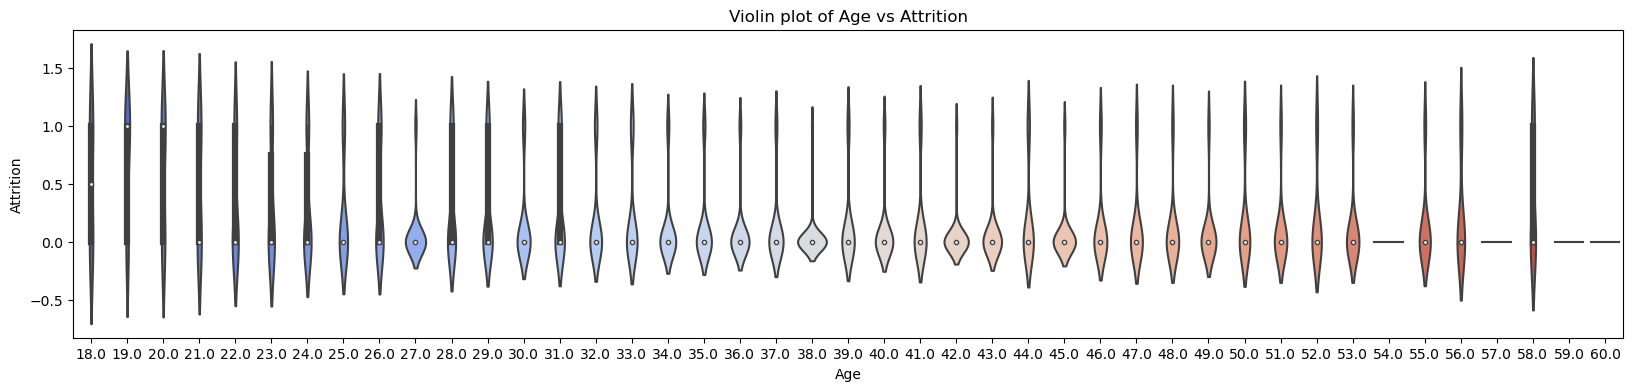

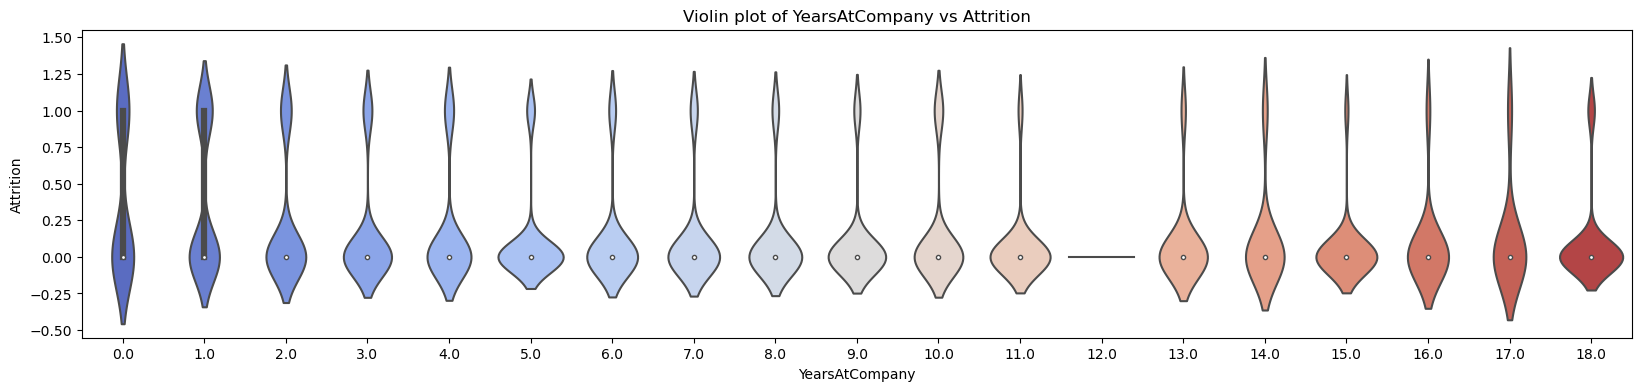

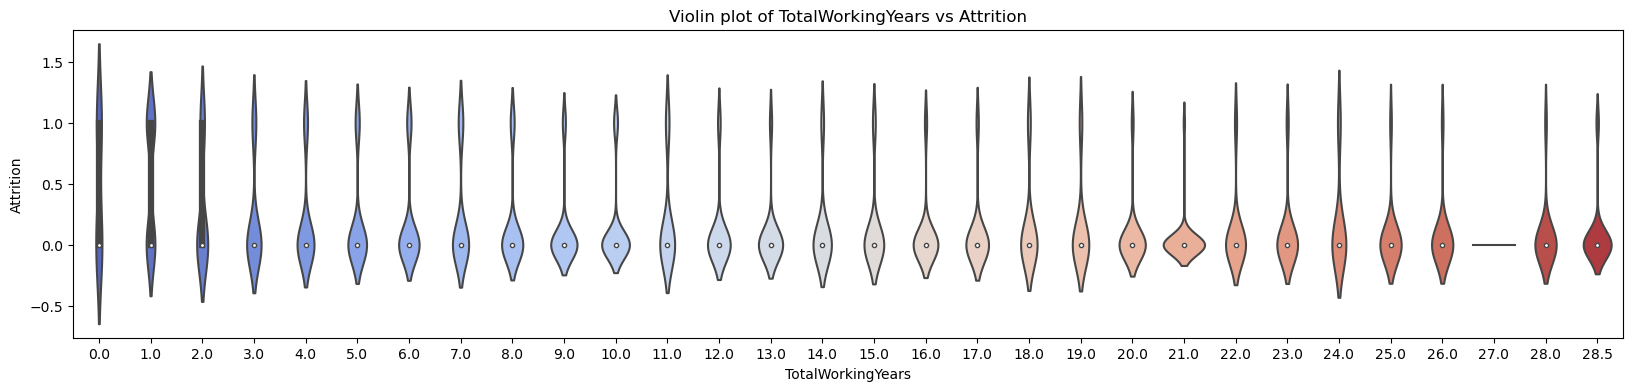

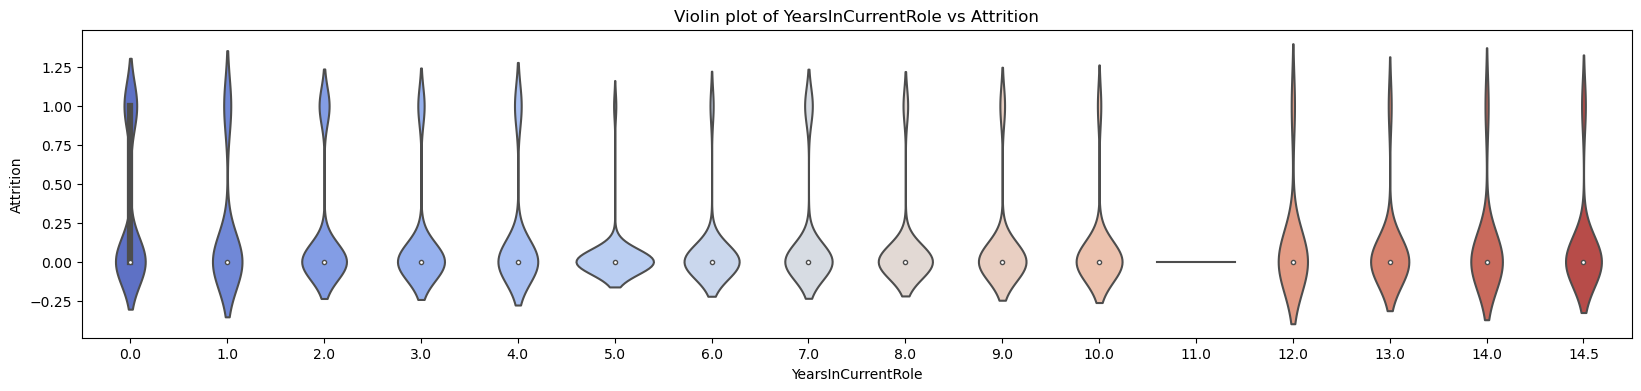

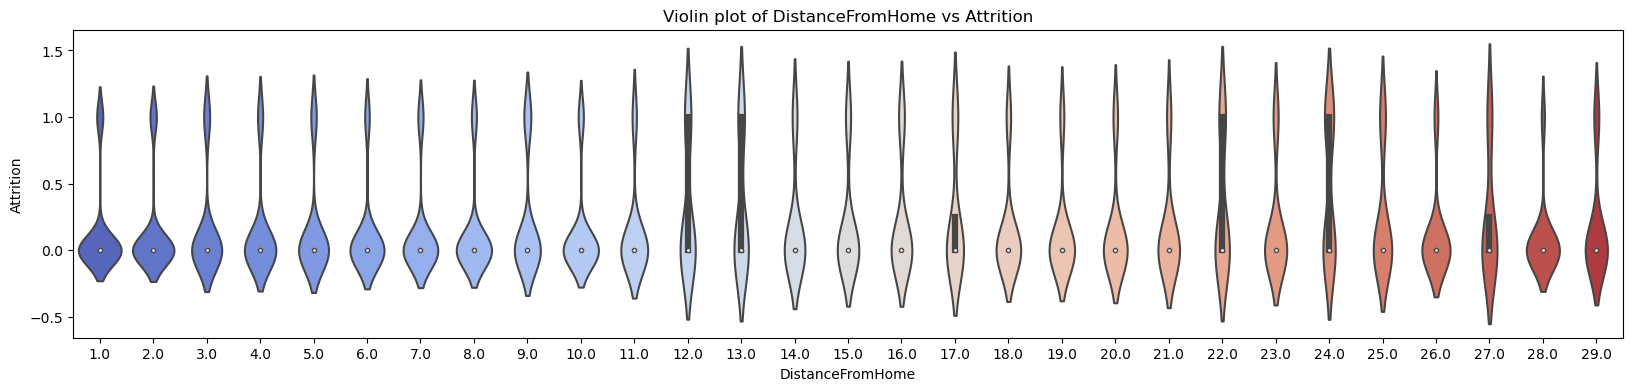

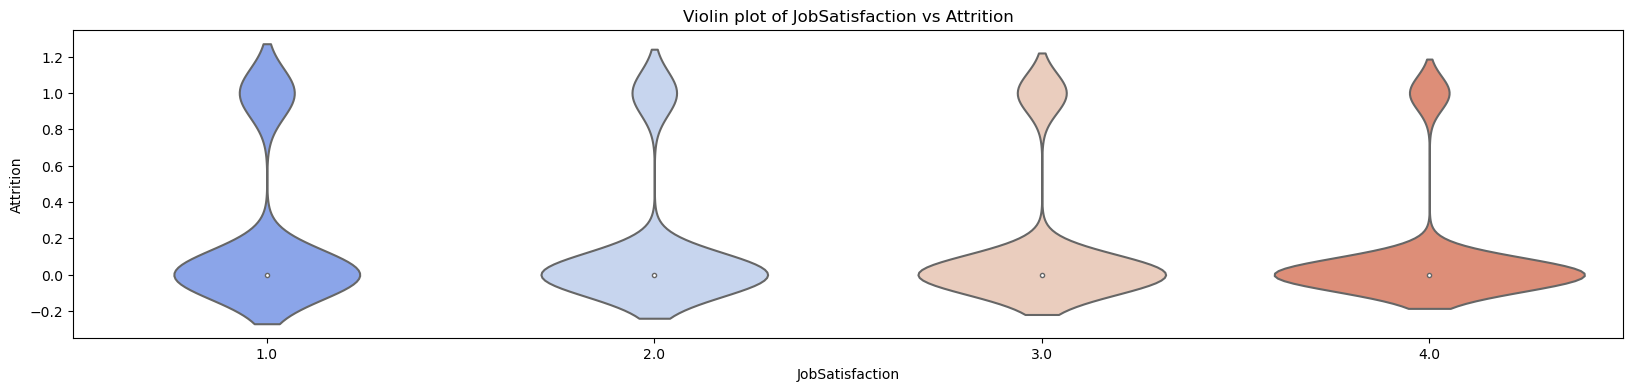

In [39]:
columns = ['Age', 'YearsAtCompany','TotalWorkingYears', 'YearsInCurrentRole', 'DistanceFromHome','JobSatisfaction']
for col in columns:
    plt.figure(figsize=(20, 4))
    sns.violinplot(x=col, y='Attrition', data=df1, palette='coolwarm')
    
    plt.title(f'Violin plot of {col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('Attrition')
    plt.show()

***3D Scatter Plot***

In [41]:
import plotly.express as px
fig = px.scatter_3d(df1, x='YearsAtCompany', y='DistanceFromHome', z='MonthlyIncome', color='Attrition', color_continuous_scale=px.colors.diverging.RdYlBu)

fig.show()

**Heatmap**

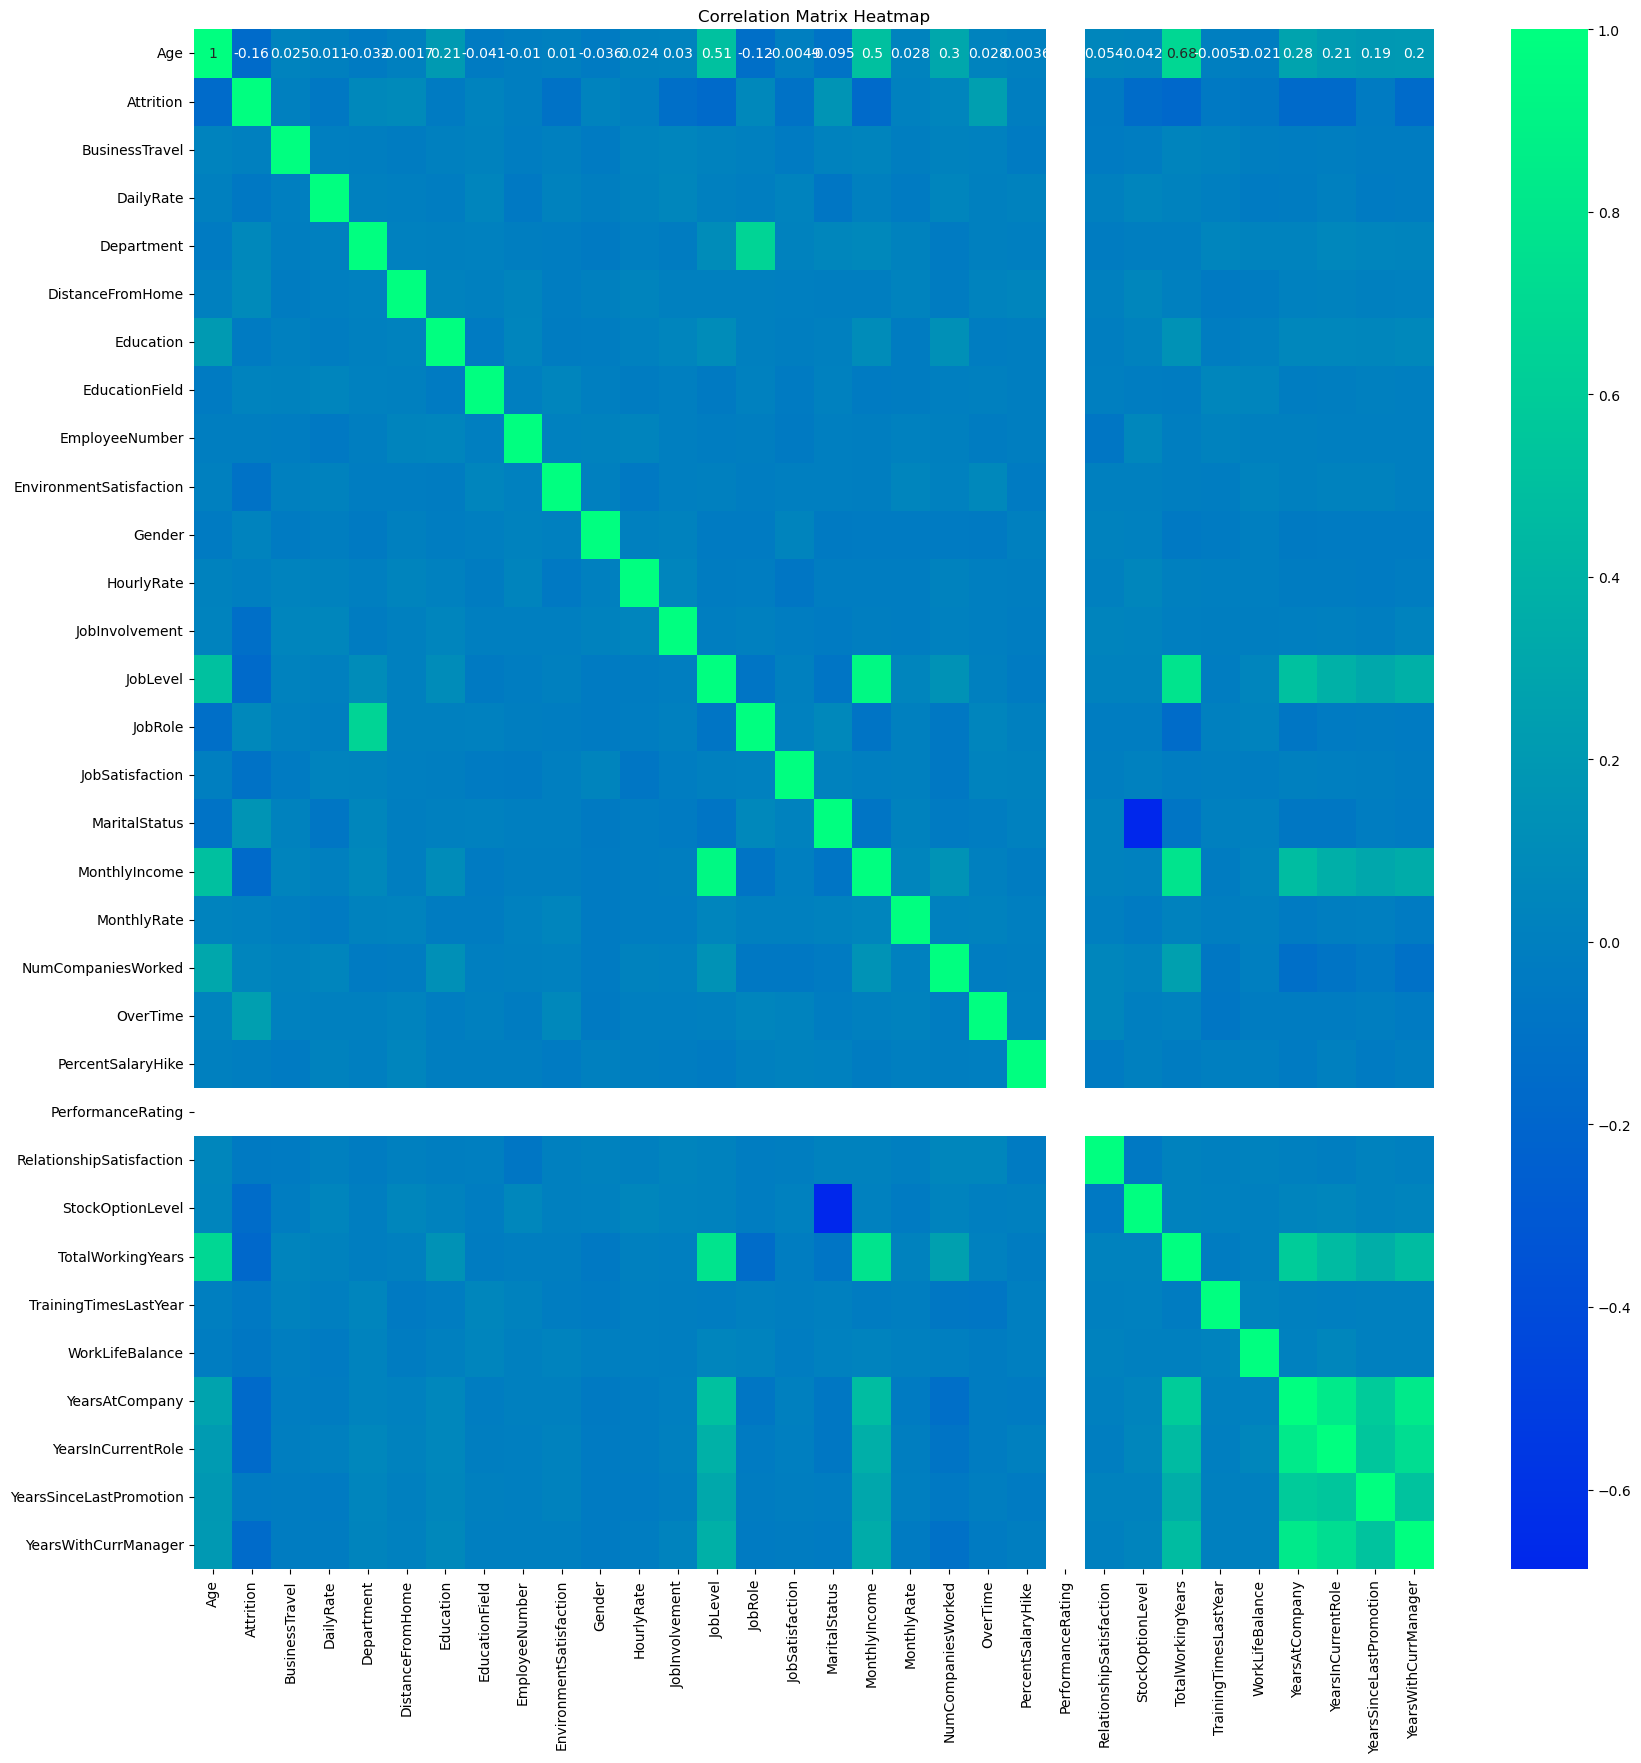

In [43]:
plt.figure(figsize=(20, 20))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='winter', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [44]:
# dropping column with only one unique Value

In [45]:
df1.drop(['PerformanceRating'], axis=1, inplace=True) 

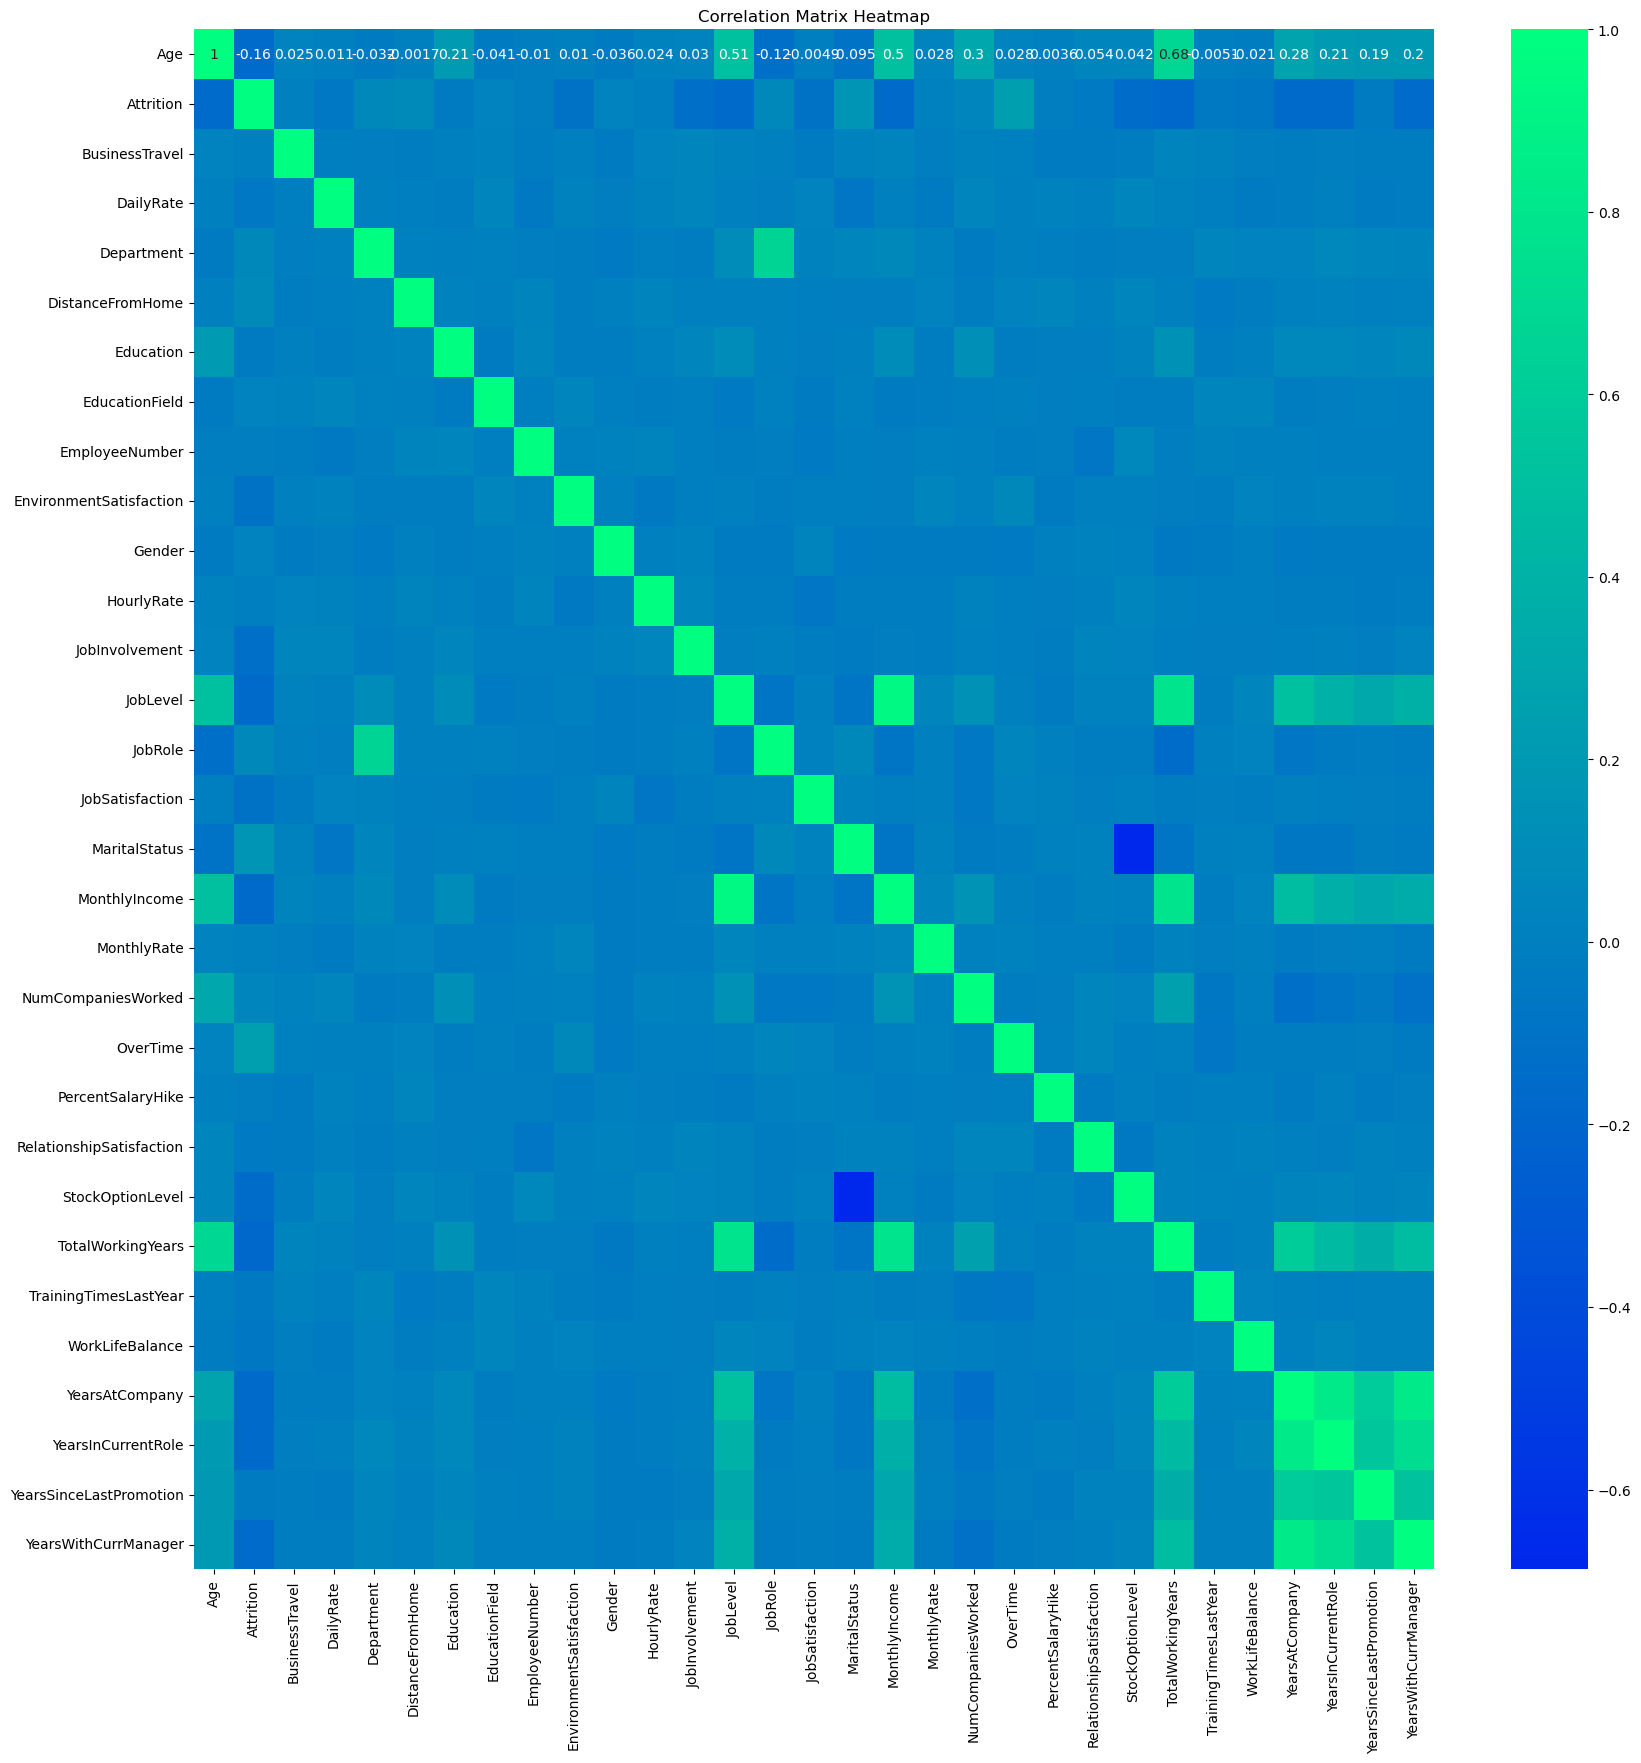

In [46]:
plt.figure(figsize=(20, 20))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='winter', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# *Model Building*

In [48]:
X = df1.drop(['Attrition'], axis=1)
Y = df1['Attrition']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=80)

In [50]:
X_train.shape

(1102, 30)

In [51]:
X_test.shape

(368, 30)

***Scaling***

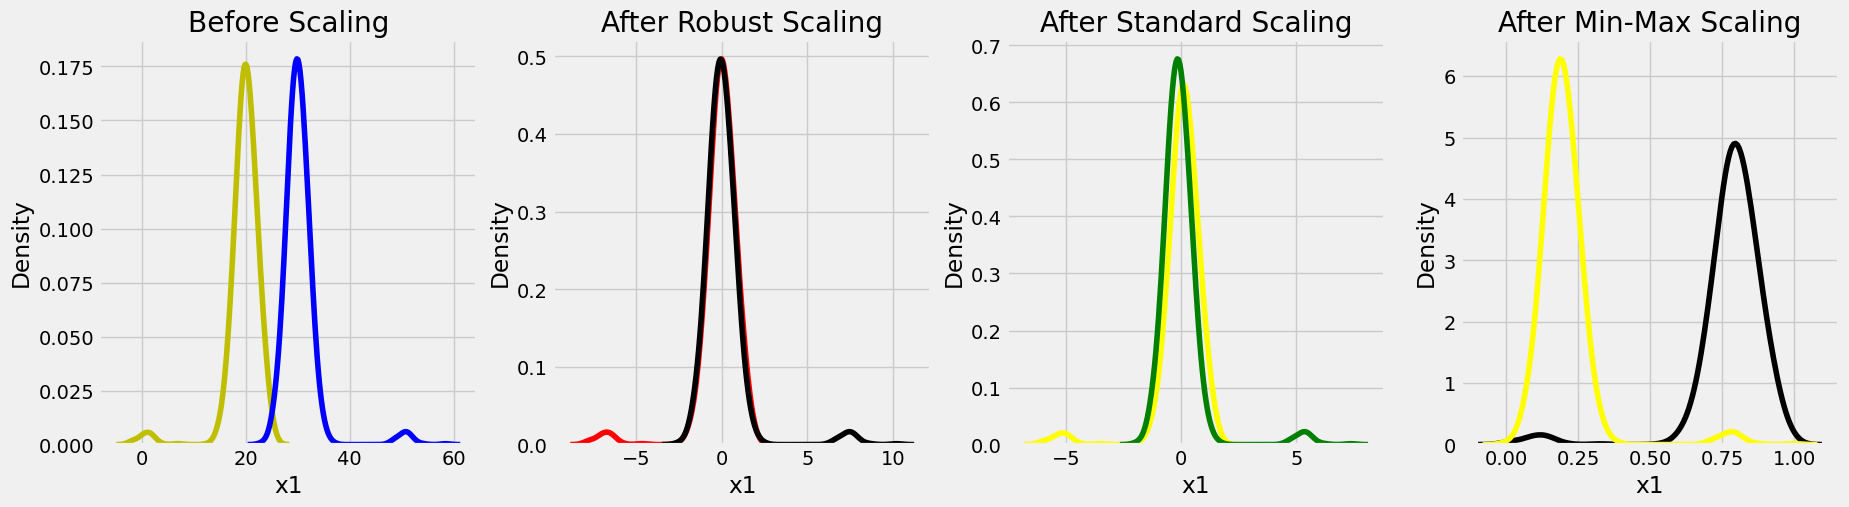

In [53]:
from sklearn import preprocessing  
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('fivethirtyeight')
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='y')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='black')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='yellow')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='green')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='yellow')
plt.show()

In [54]:
# Robust scaling shows the best results

In [55]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler #scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [56]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [57]:
X_scaled.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.446350        0.590048   0.742527    1.401512         -1.010909   
1  1.322365       -0.913194  -1.297775   -0.493817         -0.147150   
2  0.008343        0.590048   1.414363   -0.493817         -0.887515   
3 -0.429664       -0.913194   1.461466   -0.493817         -0.764121   
4 -1.086676        0.590048  -0.524295   -0.493817         -0.887515   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  \
0  -0.891688       -0.937414       -1.701283                -0.660531   
1  -1.868426       -0.937414       -1.699621                 0.254625   
2  -0.891688        1.316673       -1.696298                 1.169781   
3   1.061787       -0.937414       -1.694636                 1.169781   
4  -1.868426        0.565311       -1.691313                -1.575686   

     Gender  HourlyRate  JobInvolvement  JobLevel   JobRole  JobSatisfaction  \
0 -1.224745    1.383138        0.379672 -0.057788  1.032716         1.153254   
1  0.816497   -0.240677       -1.026167 -0.057788  0.626374        -0.660853   
2  0.816497    1.284725       -1.026167 -0.961486 -0.998992         0.246200   
3 -1.224745   -0.486709        0.379672 -0.961486  0.626374         0.246200   
4  0.816497   -1.274014        0.379672 -0.961486 -0.998992        -0.660853   

   MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0       1.236820      -0.084766     0.726020            2.169877  1.591746   
1      -0.133282      -0.283072     1.488876           -0.682817 -0.628241   
2       1.236820      -0.981623    -1.674841            1.354822  1.591746   
3      -0.133282      -0.793428     1.243211           -0.682817  1.591746   
4      -0.133282      -0.664977     0.325900            2.373641 -0.628241   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0          -1.150554                 -1.584178         -0.978160   
1           2.129306                  1.191438          0.300537   
2          -0.057267                 -0.658973         -0.978160   
3          -1.150554                  0.266233         -0.978160   
4          -0.877232                  1.191438          0.300537   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.424999              -2.130765        -2.493820       -0.123832   
1          -0.151076               0.278639         0.338096        0.678078   
2          -0.561960               0.278639         0.338096       -1.326697   
3          -0.424999               0.278639         0.338096        0.277123   
4          -0.698921               0.278639         0.338096       -0.925742   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0           -0.058474                -0.776139              0.253823  
1            0.785616                -0.372486              0.822605  
2           -1.183926                -0.776139             -1.168130  
3            0.785616                 0.434819             -1.168130  
4           -0.621200                 0.031166             -0.599348

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=80,stratify=Y)

In [60]:
X_train.shape

(1102, 30)

In [61]:
X_test.shape

(368, 30)

# *Model Evaluation*

In [63]:
import time
results = {
    'Algorithm': [],
    'Training Time': [],
    'training accuracy': [],
    'testing accuracy': [],
    'AUC Score' : [],
}

***Logistic Regression***

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
from sklearn.linear_model import LogisticRegression
start_time = time.time()
logmod=LogisticRegression()
logmod.fit(X_train,Y_train)

Y_train_predict=logmod.predict(X_train)
logmod.fit(X_test,Y_test)

print("train accuracy :", accuracy_score(Y_train,Y_train_predict))
confusion_matrix(Y_train,Y_train_predict)
print(classification_report(Y_train,Y_train_predict))

Y_predict_test=logmod.predict(X_test)
print("\ntest accuracy : ",accuracy_score(Y_test,Y_predict_test))
confusion_matrix(Y_test,Y_predict_test)
print(classification_report(Y_test,Y_predict_test))
end_time = time.time()
training_time= end_time - start_time

from sklearn.metrics import roc_auc_score
probability_score=logmod.predict_proba(X_test) #ROC AUC

probability_prediction_positive = logmod.predict_proba(X_test)[:,1]
# auc scores
auc_score = roc_auc_score(Y_test, probability_prediction_positive)

from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_test, probability_prediction_positive, pos_label=1)

print("AUC SCORE:",auc_score)
end_time = time.time()
training_time= end_time - start_time
#adding the values
results['Algorithm'].append('Logistic Regression')
results['Training Time'].append(training_time)
results['testing accuracy'].append(accuracy_score(Y_test,Y_predict_test))
results['training accuracy'].append(accuracy_score(Y_train,Y_train_predict))
results['AUC Score'].append(auc_score)



train accuracy : 0.8756805807622504
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       924
           1       0.75      0.35      0.48       178

    accuracy                           0.88      1102
   macro avg       0.82      0.66      0.70      1102
weighted avg       0.86      0.88      0.86      1102


test accuracy :  0.904891304347826
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       309
           1       0.82      0.53      0.64        59

    accuracy                           0.90       368
   macro avg       0.87      0.75      0.79       368
weighted avg       0.90      0.90      0.90       368

AUC SCORE: 0.9013767758214031


*ROC AUC curve*

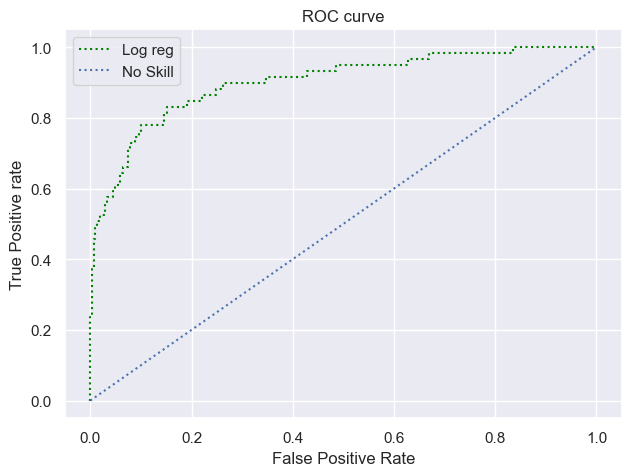

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')
sns.set_theme()
# plot roc curves
plt.plot(fpr, tpr, linestyle='dotted',color='green', label='Log reg')

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='dotted', label='No Skill')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.savefig('ROC', dpi=400)
plt.show()

***Support Vector Classification***

In [69]:
#kernel=poly

In [70]:
from sklearn.svm import SVC,SVR
start_time = time.time()
svcmodel = SVC(kernel="poly", degree=1, C=100, gamma=0.1, verbose=True, probability=True, class_weight="balanced") 
svcmodel.fit(X_train,Y_train)
Y_train_predict=svcmodel.predict(X_train)
print("accuracy score train",accuracy_score(Y_train,Y_train_predict))

Y_predict_test=svcmodel.predict(X_test)
print("\naccuracy score test",accuracy_score(Y_test,Y_predict_test))

print("\nconfusion matrix of train\n", confusion_matrix(Y_train,Y_train_predict))
print("\nconfusion matrix of test\n", confusion_matrix(Y_test,Y_predict_test))

probability_score=svcmodel.predict_proba(X_test) #ROC AUC

probability_prediction_positive = svcmodel.predict_proba(X_test)[:,1]
# auc scores
auc_score = roc_auc_score(Y_test, probability_prediction_positive)

from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_test, probability_prediction_positive, pos_label=1)

print("AUC SCORE:",auc_score)

end_time = time.time()
training_time= end_time - start_time
#adding the values
results['Algorithm'].append('SVC Poly')
results['Training Time'].append(training_time)
results['testing accuracy'].append(accuracy_score(Y_test,Y_predict_test))
results['training accuracy'].append(accuracy_score(Y_train,Y_train_predict))
results['AUC Score'].append(auc_score)

[LibSVM]accuracy score train 0.7667876588021778

accuracy score test 0.7635869565217391

confusion matrix of train
 [[705 219]
 [ 38 140]]

confusion matrix of test
 [[238  71]
 [ 16  43]]
AUC SCORE: 0.8397783994295431


In [71]:
#kernel=rbf

In [72]:
start_time = time.time()
svcmodel=SVC(kernel="rbf",degree=3,C=100,gamma=0.001, probability=True, class_weight="balanced") 
svcmodel.fit(X_train,Y_train)
Y_train_predict=svcmodel.predict(X_train)
print("accuracy score train",accuracy_score(Y_train,Y_train_predict))

Y_predict_test=svcmodel.predict(X_test)
print("\naccuracy score test",accuracy_score(Y_test,Y_predict_test))

print("\nconfusion matrix of train\n", confusion_matrix(Y_train,Y_train_predict))
print("\nconfusion matrix of test\n", confusion_matrix(Y_test,Y_predict_test))

probability_score=svcmodel.predict_proba(X_test) #ROC AUC
# predict probabilities
probability_prediction_positive = svcmodel.predict_proba(X_test)[:,1]
# auc scores
auc_score = roc_auc_score(Y_test, probability_prediction_positive)

from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_test, probability_prediction_positive, pos_label=1)

print("\nAUC SCORE:",auc_score)

end_time = time.time()
training_time= end_time - start_time
#adding the values
results['Algorithm'].append('SVC rbf')
results['Training Time'].append(training_time)
results['testing accuracy'].append(accuracy_score(Y_test,Y_predict_test))
results['training accuracy'].append(accuracy_score(Y_train,Y_train_predict))
results['AUC Score'].append(auc_score)


accuracy score train 0.8312159709618875

accuracy score test 0.7635869565217391

confusion matrix of train
 [[765 159]
 [ 27 151]]

confusion matrix of test
 [[240  69]
 [ 18  41]]

AUC SCORE: 0.835061159563381


In [73]:
#kernel=sigmoid

In [74]:
start_time = time.time()
svcmodel=SVC(kernel="sigmoid",degree=3,C=10,gamma=0.01, probability=True, class_weight="balanced") 
svcmodel.fit(X_train,Y_train)
Y_train_predict=svcmodel.predict(X_train)
print("\naccuracy score train",accuracy_score(Y_train,Y_train_predict))

Y_predict_test=svcmodel.predict(X_test)
print("\naccuracy score test",accuracy_score(Y_test,Y_predict_test))

print("\nconfusion matrix of train\n", confusion_matrix(Y_train,Y_train_predict))
print("\nconfusion matrix of test\n", confusion_matrix(Y_test,Y_predict_test))

probability_score=svcmodel.predict_proba(X_test) #ROC AUC
# predict probabilities
probability_prediction_positive = svcmodel.predict_proba(X_test)[:,1]
# auc scores
auc_score = roc_auc_score(Y_test, probability_prediction_positive)

from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_test, probability_prediction_positive, pos_label=1)

print("\nAUC SCORE:",auc_score)

end_time = time.time()
training_time= end_time - start_time
#adding the values
results['Algorithm'].append('SVC sigmoid')
results['Training Time'].append(training_time)
results['testing accuracy'].append(accuracy_score(Y_test,Y_predict_test))
results['training accuracy'].append(accuracy_score(Y_train,Y_train_predict))
results['AUC Score'].append(auc_score)


accuracy score train 0.7413793103448276

accuracy score test 0.7554347826086957

confusion matrix of train
 [[695 229]
 [ 56 122]]

confusion matrix of test
 [[234  75]
 [ 15  44]]

AUC SCORE: 0.8491854533486918


In [75]:
#kernel=linear

In [76]:
start_time = time.time()
svcmodel=SVC(kernel="linear",degree=2,C=20,gamma=40, probability=True, class_weight="balanced") 
svcmodel.fit(X_train,Y_train)
Y_train_predict=svcmodel.predict(X_train)
print("accuracy score train",accuracy_score(Y_train,Y_train_predict))

Y_predict_test=svcmodel.predict(X_test)
print("\naccuracy score test",accuracy_score(Y_test,Y_predict_test))

print("\nconfusion matrix of train\n", confusion_matrix(Y_train,Y_train_predict))
print("\nconfusion matrix of test\n", confusion_matrix(Y_test,Y_predict_test))

probability_score=svcmodel.predict_proba(X_test) #ROC AUC
# predict probabilities
probability_prediction_positive = svcmodel.predict_proba(X_test)[:,1]
# auc scores
auc_score = roc_auc_score(Y_test, probability_prediction_positive)

from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_test, probability_prediction_positive, pos_label=1)

print("\nAUC SCORE:",auc_score)

end_time = time.time()
training_time= end_time - start_time
#adding the values
results['Algorithm'].append('SVC linear')
results['Training Time'].append(training_time)
results['testing accuracy'].append(accuracy_score(Y_test,Y_predict_test))
results['training accuracy'].append(accuracy_score(Y_train,Y_train_predict))
results['AUC Score'].append(auc_score)


accuracy score train 0.7667876588021778

accuracy score test 0.7635869565217391

confusion matrix of train
 [[705 219]
 [ 38 140]]

confusion matrix of test
 [[238  71]
 [ 16  43]]

AUC SCORE: 0.8398332510558938


***K-Nearest Neighbors***

In [78]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

Text(0.5, 0, 'k value')

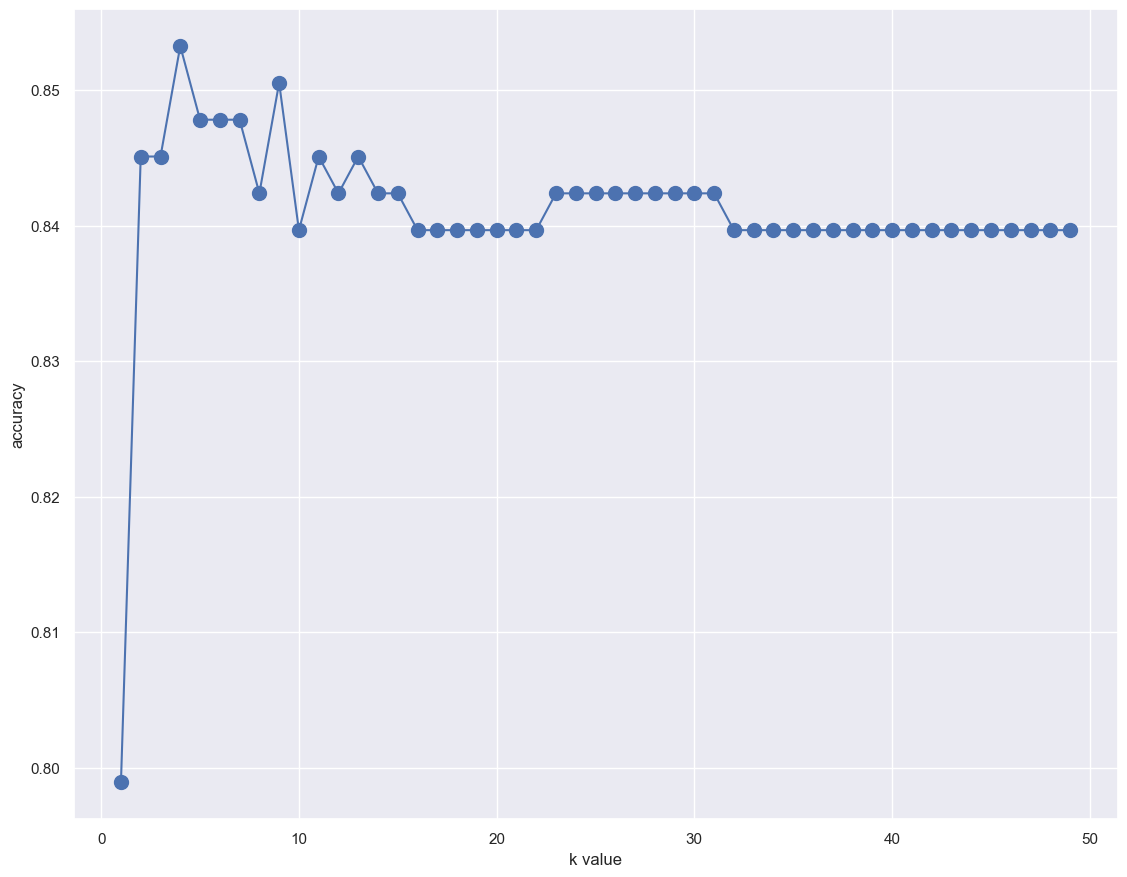

In [79]:
start_time = time.time()
best_accuracy=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    best_accuracy.append(accuracy)
    
plt.figure(figsize=(12,10))
plt.plot(range(1,50),best_accuracy,marker="o",markersize=10)
plt.ylabel("accuracy")
plt.xlabel("k value")

In [80]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,Y_train)

Y_train_predict=knn.predict(X_train)
accuracy_train=accuracy_score(Y_train,Y_train_predict)
print("accuracy of train is ",accuracy_train)
confusion_matrix(Y_train,Y_train_predict)

Y_predict_test=knn.predict(X_test)
accuracy_test=accuracy_score(Y_test,Y_predict_test)
print('\naccuracy of test is ', accuracy_test)
confusion_matrix(Y_test,Y_predict_test)

from sklearn.metrics import roc_auc_score
probability_score=knn.predict_proba(X_test) #ROC AUC
# predict probabilities
probability_prediction_positive = knn.predict_proba(X_test)[:,1]
# auc scores
auc_score = roc_auc_score(Y_test, probability_prediction_positive)

from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_test, probability_prediction_positive, pos_label=1)

print("\nAUC SCORE:",auc_score)

end_time = time.time()
training_time= end_time - start_time
#adding the values
results['Algorithm'].append('K Neighbors Classifier')
results['Training Time'].append(training_time)
results['testing accuracy'].append(accuracy_score(Y_test,Y_predict_test))
results['training accuracy'].append(accuracy_score(Y_train,Y_train_predict))
results['AUC Score'].append(auc_score)


accuracy of train is  0.8584392014519057

accuracy of test is  0.8532608695652174

AUC SCORE: 0.7330645603642147


***Decision Tree Classifier***

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
start_time = time.time()
dt = DecisionTreeClassifier(class_weight ="balanced",max_depth=4,min_samples_split=7)
dt.fit(X_train, Y_train)
Y_train_predict = dt.predict(X_train)
training_accuracy = accuracy_score(Y_train, Y_train_predict)
print('The training accuracy for Decision Tree Classifier is', training_accuracy)

Y_predict_test = dt.predict(X_test)

accuracy = accuracy_score(Y_test, Y_predict_test)
print('\nThe testing accuracy for Decision Tree Classifier is', accuracy)

print('\nClassification Report:')
print(classification_report(Y_test, Y_predict_test))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, Y_predict_test))

probability_score=dt.predict_proba(X_test) #ROC AUC
# predict probabilities
probability_prediction_positive = dt.predict_proba(X_test)[:,1]
# auc scores
auc_score = roc_auc_score(Y_test, probability_prediction_positive)

from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_test, probability_prediction_positive, pos_label=1)

print("\nAUC SCORE:",auc_score)

print("\nAUC SCORE:",auc_score)

end_time = time.time()
training_time= end_time - start_time
#adding the values
results['Algorithm'].append('Decision Tree Classifier')
results['Training Time'].append(training_time)
results['testing accuracy'].append(accuracy_score(Y_test,Y_predict_test))
results['training accuracy'].append(accuracy_score(Y_train,Y_train_predict))
results['AUC Score'].append(auc_score)


The training accuracy for Decision Tree Classifier is 0.7958257713248639

The testing accuracy for Decision Tree Classifier is 0.7989130434782609

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       309
           1       0.42      0.63      0.50        59

    accuracy                           0.80       368
   macro avg       0.67      0.73      0.69       368
weighted avg       0.84      0.80      0.81       368


Confusion Matrix:
[[257  52]
 [ 22  37]]

AUC SCORE: 0.7997092863803412

AUC SCORE: 0.7997092863803412


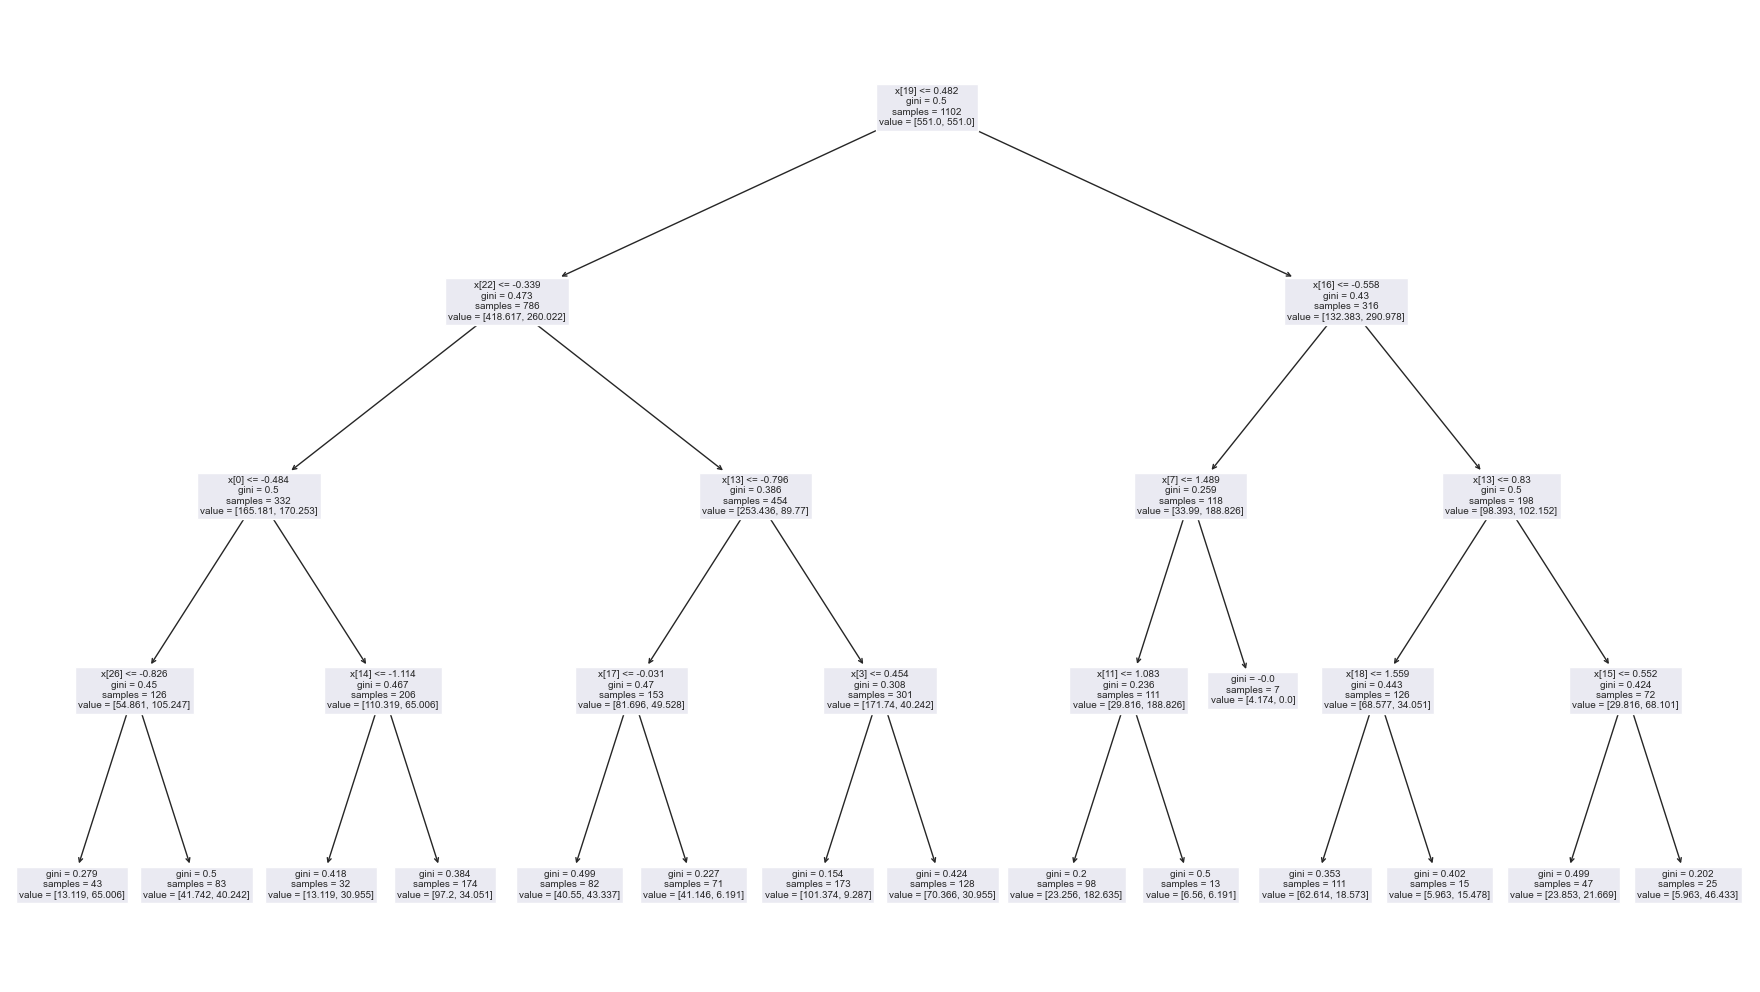

In [83]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt)
plt.show()

# Comparison

In [85]:
dfresults = pd.DataFrame(results)
dfresults

Algorithm  Training Time  training accuracy  \
0       Logistic Regression       0.067691           0.875681   
1                  SVC Poly       5.273798           0.766788   
2                   SVC rbf       0.996930           0.831216   
3               SVC sigmoid       0.724835           0.741379   
4                SVC linear       8.803622           0.766788   
5    K Neighbors Classifier       7.605458           0.858439   
6  Decision Tree Classifier       0.055499           0.795826   

   testing accuracy  AUC Score  
0          0.904891   0.901377  
1          0.763587   0.839778  
2          0.763587   0.835061  
3          0.755435   0.849185  
4          0.763587   0.839833  
5          0.853261   0.733065  
6          0.798913   0.799709

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'SVC Poly'),
  Text(2, 0, 'SVC rbf'),
  Text(3, 0, 'SVC sigmoid'),
  Text(4, 0, 'SVC linear'),
  Text(5, 0, 'K Neighbors Classifier'),
  Text(6, 0, 'Decision Tree Classifier')])

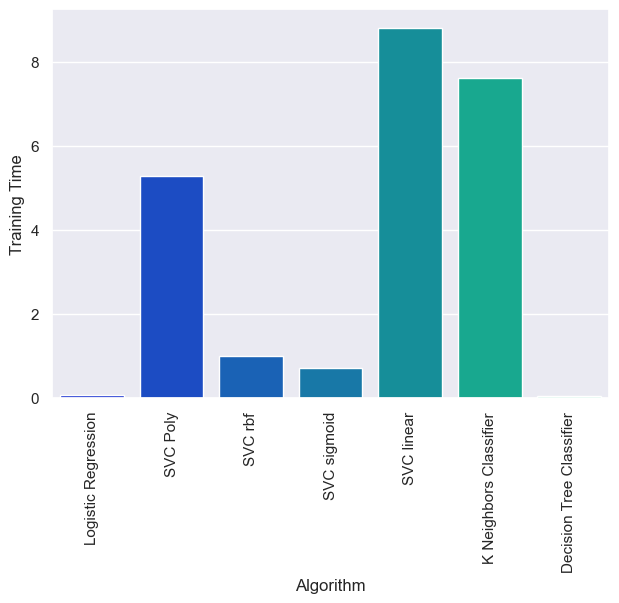

In [86]:
sns.barplot(x='Algorithm', y=dfresults['Training Time'], data=dfresults, palette='winter')
plt.xticks(rotation=90)

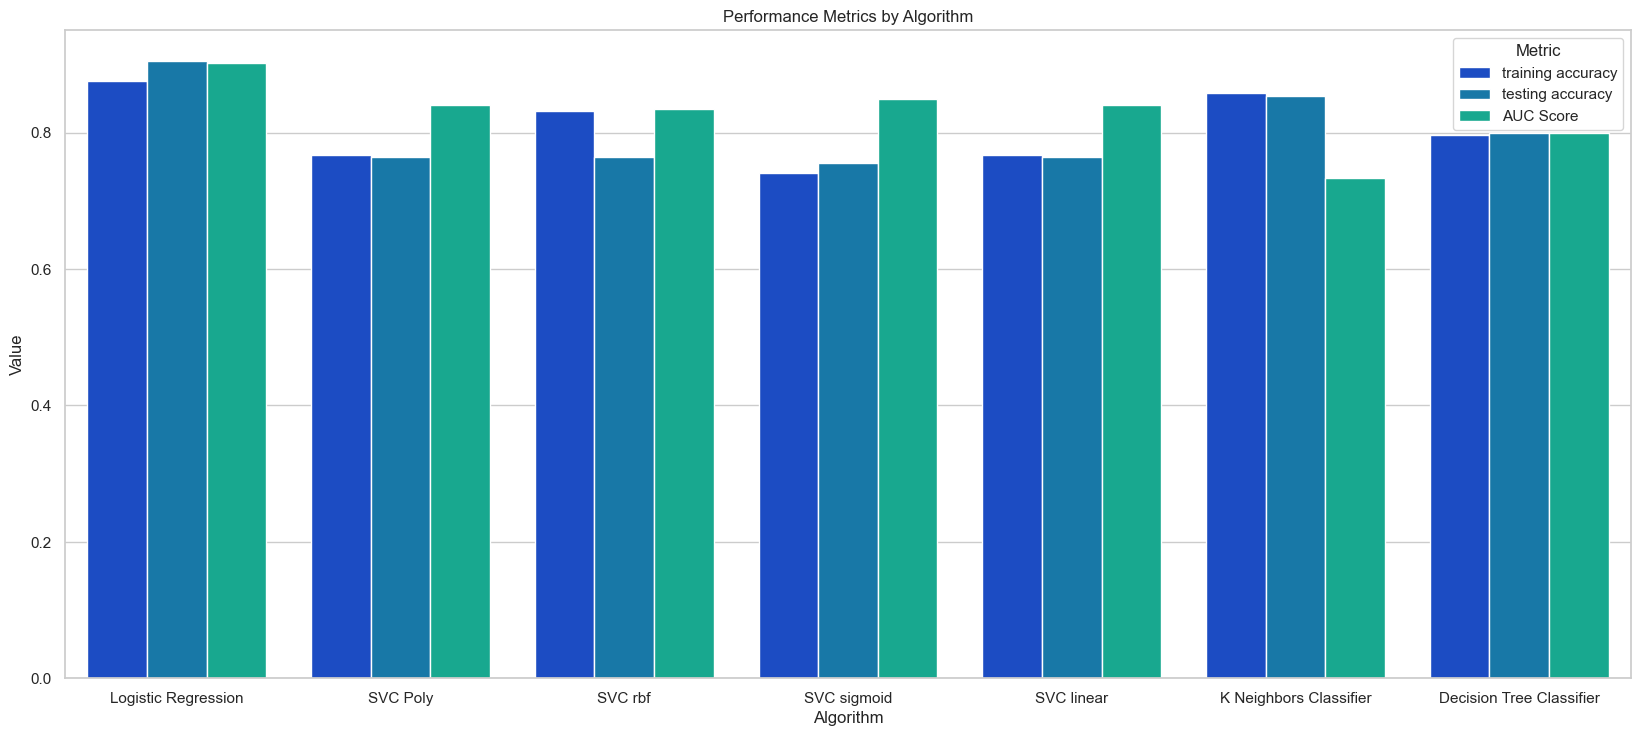

In [87]:


dfresults = pd.melt(dfresults, id_vars=['Algorithm'], value_vars=['training accuracy', 'testing accuracy', 'AUC Score'], 
                     var_name='Metric', value_name='Value')

sns.set(style="whitegrid")

plt.figure(figsize=(18, 8))

sns.barplot(x='Algorithm', y='Value', hue='Metric', data=dfresults, palette='winter')

plt.title('Performance Metrics by Algorithm')

plt.legend(title='Metric')

plt.show()



# *Logistic Regression delivered the best results.*